In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

# ***`Очистка и подготовка данных:`***



# **Calls**

In [ ]:
calls = pd.read_excel("Calls (Done).xlsx", dtype={'Id': str, "CONTACTID": str})

In [ ]:
def clean_cols(df):

    df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
    return df

calls = clean_cols(calls)

print(calls.columns)

Index(['id', 'call_start_time', 'call_owner_name', 'contactid', 'call_type',
       'call_duration_(in_seconds)', 'call_status', 'dialled_number',
       'outgoing_call_status', 'scheduled_in_crm', 'tag'],
      dtype='object')


In [ ]:
calls = clean_cols(calls)
display(calls.head(5))

,id,call_start_time,call_owner_name,contactid,call_type,call_duration_(in_seconds),call_status,dialled_number,outgoing_call_status,scheduled_in_crm,tag
0,5805028000000805001,30.06.2023 08:43,John Doe,NaN,Inbound,171.0,Received,NaN,NaN,NaN,NaN
1,5805028000000768006,30.06.2023 08:46,John Doe,NaN,Outbound,28.0,Attended Dialled,NaN,Completed,0.0,NaN
2,5805028000000764027,30.06.2023 08:59,John Doe,NaN,Outbound,24.0,Attended Dialled,NaN,Completed,0.0,NaN
3,5805028000000787003,30.06.2023 09:20,John Doe,5805028000000645014,Outbound,6.0,Attended Dialled,NaN,Completed,0.0,NaN
4,5805028000000768019,30.06.2023 09:30,John Doe,5805028000000645014,Outbound,11.0,Attended Dialled,NaN,Completed,0.0,NaN


In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          95874 non-null  object 
 1   call_start_time             95874 non-null  object 
 2   call_owner_name             95874 non-null  object 
 3   contactid                   91941 non-null  object 
 4   call_type                   95874 non-null  object 
 5   call_duration_(in_seconds)  95791 non-null  float64
 6   call_status                 95874 non-null  object 
 7   dialled_number              0 non-null      float64
 8   outgoing_call_status        86875 non-null  object 
 9   scheduled_in_crm            86875 non-null  float64
 10  tag                         0 non-null      float64
dtypes: float64(4), object(7)
memory usage: 8.0+ MB


In [ ]:
calls_summary = pd.DataFrame({
    'Data Type': calls.dtypes,
    'Unique Values': calls.nunique(),
    'Non-Null Count': calls.notnull().sum(),
    'Null Count': calls.isnull().sum(),
    'Null Percentage (%)': (calls.isnull().sum() / len(calls)) * 100,
   ' is Nan': calls.isna().any(),
    'Is Categorical': (calls.dtypes == 'object') | (calls.dtypes == 'category')
})

display(calls_summary)

,Data Type,Unique Values,Non-Null Count,Null Count,Null Percentage (%),is Nan,Is Categorical
id,object,95874,95874,0,0.000000,False,True
call_start_time,object,68445,95874,0,0.000000,False,True
call_owner_name,object,33,95874,0,0.000000,False,True
contactid,object,15214,91941,3933,4.102259,True,True
call_type,object,3,95874,0,0.000000,False,True
call_duration_(in_seconds),float64,2619,95791,83,0.086572,True,False
call_status,object,11,95874,0,0.000000,False,True
dialled_number,float64,0,0,95874,100.000000,True,False
outgoing_call_status,object,4,86875,8999,9.386278,True,True
scheduled_in_crm,float64,2,86875,8999,9.386278,True,False


/tmp/ipython-input-2077287544.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




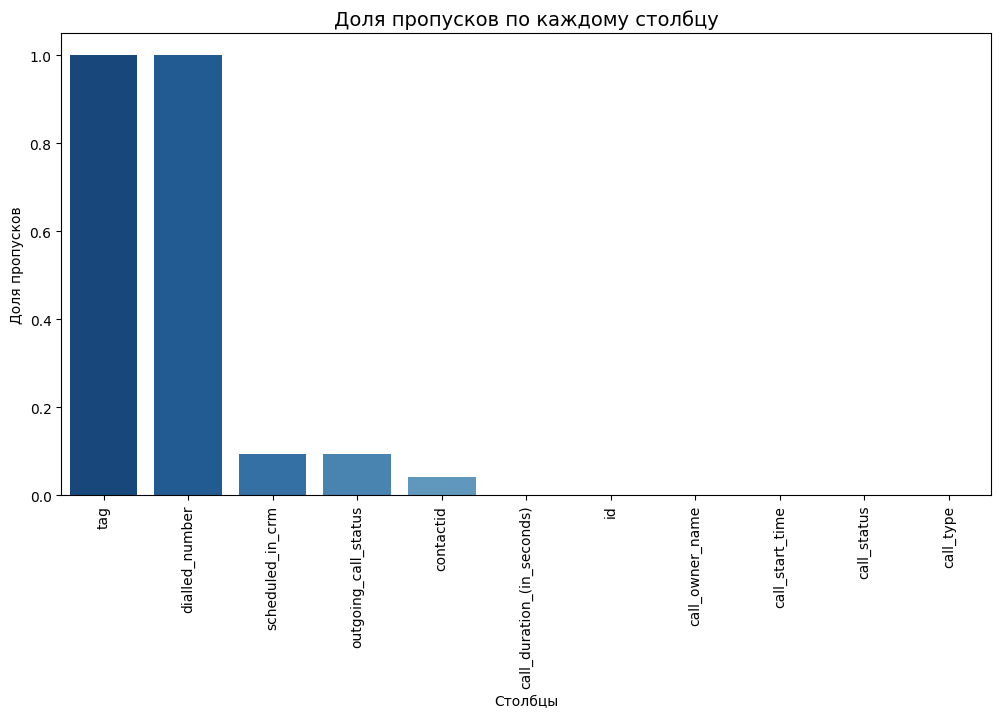

In [ ]:
missing_summary = calls.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_summary.index, y=missing_summary.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Доля пропусков по каждому столбцу", fontsize=14)
plt.ylabel("Доля пропусков")
plt.xlabel("Столбцы")
plt.show()

**Удаление дубликатов и неактуальных столбцов.**

In [ ]:
calls = calls.drop_duplicates()

In [ ]:
calls[calls.duplicated()]

,id,call_start_time,call_owner_name,contactid,call_type,call_duration_(in_seconds),call_status,dialled_number,outgoing_call_status,scheduled_in_crm,tag


In [ ]:
duplicate_calls = calls[
    calls.duplicated(subset=["call_start_time", "call_status", "contactid"], keep=False)
]

duplicate_calls = duplicate_calls.sort_values(
    by=["call_start_time", "call_status", "contactid"]
)

display(duplicate_calls)

,id,call_start_time,call_owner_name,contactid,call_type,call_duration_(in_seconds),call_status,dialled_number,outgoing_call_status,scheduled_in_crm,tag
42526,5805028000029376746,01.02.2024 07:35,Charlie Davis,NaN,Outbound,12.0,Attended Dialled,NaN,Completed,0.0,NaN
42527,5805028000029405544,01.02.2024 07:35,Charlie Davis,NaN,Outbound,10.0,Attended Dialled,NaN,Completed,0.0,NaN
42548,5805028000029364837,01.02.2024 10:29,Ian Miller,5805028000029411552,Outbound,9.0,Attended Dialled,NaN,Completed,0.0,NaN
42549,5805028000029421873,01.02.2024 10:29,Ian Miller,5805028000029411552,Outbound,9.0,Attended Dialled,NaN,Completed,0.0,NaN
42607,5805028000029580013,01.02.2024 11:57,Yara Edwards,5805028000029233013,Outbound,4.0,Attended Dialled,NaN,Completed,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18400,5805028000014575330,31.10.2023 18:05,Diana Evans,5805028000010414495,Outbound,5.0,Attended Dialled,NaN,Completed,0.0,NaN
18402,5805028000014576460,31.10.2023 18:05,Diana Evans,5805028000010414495,Outbound,5.0,Attended Dialled,NaN,Completed,0.0,NaN
18431,5805028000014617416,31.10.2023 18:49,Julia Nelson,5805028000009968052,Outbound,8.0,Attended Dialled,NaN,Completed,0.0,NaN
18432,5805028000014581285,31.10.2023 18:49,Julia Nelson,5805028000009968052,Outbound,8.0,Attended Dialled,NaN,Completed,0.0,NaN


In [ ]:
calls_cleaned = (
    calls.sort_values("call_duration_(in_seconds)", ascending=False)
    .drop_duplicates(subset=["call_start_time", "call_status", "contactid"])
)

display(calls_cleaned.head())

,id,call_start_time,call_owner_name,contactid,call_type,call_duration_(in_seconds),call_status,dialled_number,outgoing_call_status,scheduled_in_crm,tag
29250,5805028000021593632,15.12.2023 19:05,Sam Young,5805028000021404645,Outbound,7625.0,Attended Dialled,NaN,Completed,0.0,NaN
78762,5805028000049344069,10.05.2024 17:34,Victor Barnes,5805028000047779175,Outbound,7200.0,Attended Dialled,NaN,Completed,0.0,NaN
56394,5805028000037508725,14.03.2024 19:46,John Doe,5805028000021062552,Inbound,6798.0,Received,NaN,NaN,NaN,NaN
28870,5805028000021415097,14.12.2023 15:49,Sam Young,5805028000021263687,Outbound,6368.0,Attended Dialled,NaN,Completed,0.0,NaN
67264,5805028000043303087,11.04.2024 16:00,Charlie Davis,5805028000041617254,Outbound,6304.0,Attended Dialled,NaN,Completed,0.0,NaN


In [ ]:
calls = calls.drop(columns=['dialled_number','tag'])

In [ ]:
calls_sorted = calls.sort_values(by='call_duration_(in_seconds)', ascending=False)

calls_cleaned_simultaneous = calls_sorted.drop_duplicates(subset=['call_start_time', 'contactid'], keep='first')

print(f"Number of rows before cleaning simultaneous calls: {len(calls)}")
print(f"Number of rows after cleaning simultaneous calls: {len(calls_cleaned_simultaneous)}")

calls = calls_cleaned_simultaneous

display(calls.head())

Number of rows before cleaning simultaneous calls: 95874
Number of rows after cleaning simultaneous calls: 86182


,id,call_start_time,call_owner_name,contactid,call_type,call_duration_(in_seconds),call_status,outgoing_call_status,scheduled_in_crm
29250,5805028000021593632,15.12.2023 19:05,Sam Young,5805028000021404645,Outbound,7625.0,Attended Dialled,Completed,0.0
78762,5805028000049344069,10.05.2024 17:34,Victor Barnes,5805028000047779175,Outbound,7200.0,Attended Dialled,Completed,0.0
56394,5805028000037508725,14.03.2024 19:46,John Doe,5805028000021062552,Inbound,6798.0,Received,NaN,NaN
28870,5805028000021415097,14.12.2023 15:49,Sam Young,5805028000021263687,Outbound,6368.0,Attended Dialled,Completed,0.0
67264,5805028000043303087,11.04.2024 16:00,Charlie Davis,5805028000041617254,Outbound,6304.0,Attended Dialled,Completed,0.0


**Обработка отсутствующих значений**

In [ ]:
calls['outgoing_call_status'] = calls['outgoing_call_status'].fillna('Unknown')
calls['scheduled_in_crm'] = calls['scheduled_in_crm'].fillna('Unknown')

/tmp/ipython-input-1889585764.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1889585764.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Преобразование типа данных для таких столбцов, как даты и числовые значения.**

In [ ]:
calls['id'] = calls['id'].astype('int64')
calls['call_start_time'] = pd.to_datetime(calls['call_start_time'], errors='coerce')
#calls['contactid'] = calls['contactid'].astype('int64')
calls['call_type'] = calls['call_type'].astype('category')
calls['call_duration_(in_seconds)'] = pd.to_numeric(calls['call_duration_(in_seconds)'], errors='coerce')
calls['call_status'] = calls['call_status'].astype('category')
calls['outgoing_call_status'] = calls['outgoing_call_status'].astype('category')
calls['scheduled_in_crm'] = calls['scheduled_in_crm'].astype('category')

/tmp/ipython-input-363670056.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-363670056.py:2: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/tmp/ipython-input-363670056.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-363670056.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
calls['outgoing_call_status'].value_counts()

,count
outgoing_call_status,
Completed,77811
Unknown,8296
Overdue,53
Cancelled,19
Scheduled,3


In [ ]:
calls['scheduled_in_crm'].value_counts()

,count
scheduled_in_crm,
0.0,77756
Unknown,8296
1.0,130


In [ ]:
mask_outgoing_nan = calls['outgoing_call_status'].isna()
mask_scheduled_nan = calls['scheduled_in_crm'].isna()

are_nans_same_rows = (mask_outgoing_nan == mask_scheduled_nan).all()

if are_nans_same_rows:
    print("Пропущенные значения в 'Outgoing Call Status' и 'Scheduled in CRM' находятся в одних и тех же строках.")
else:
    print("Пропущенные значения в 'Outgoing Call Status' и 'Scheduled in CRM' находятся в разных строках.")

display(calls[mask_outgoing_nan != mask_scheduled_nan])

Пропущенные значения в 'Outgoing Call Status' и 'Scheduled in CRM' находятся в одних и тех же строках.


,id,call_start_time,call_owner_name,contactid,call_type,call_duration_(in_seconds),call_status,outgoing_call_status,scheduled_in_crm


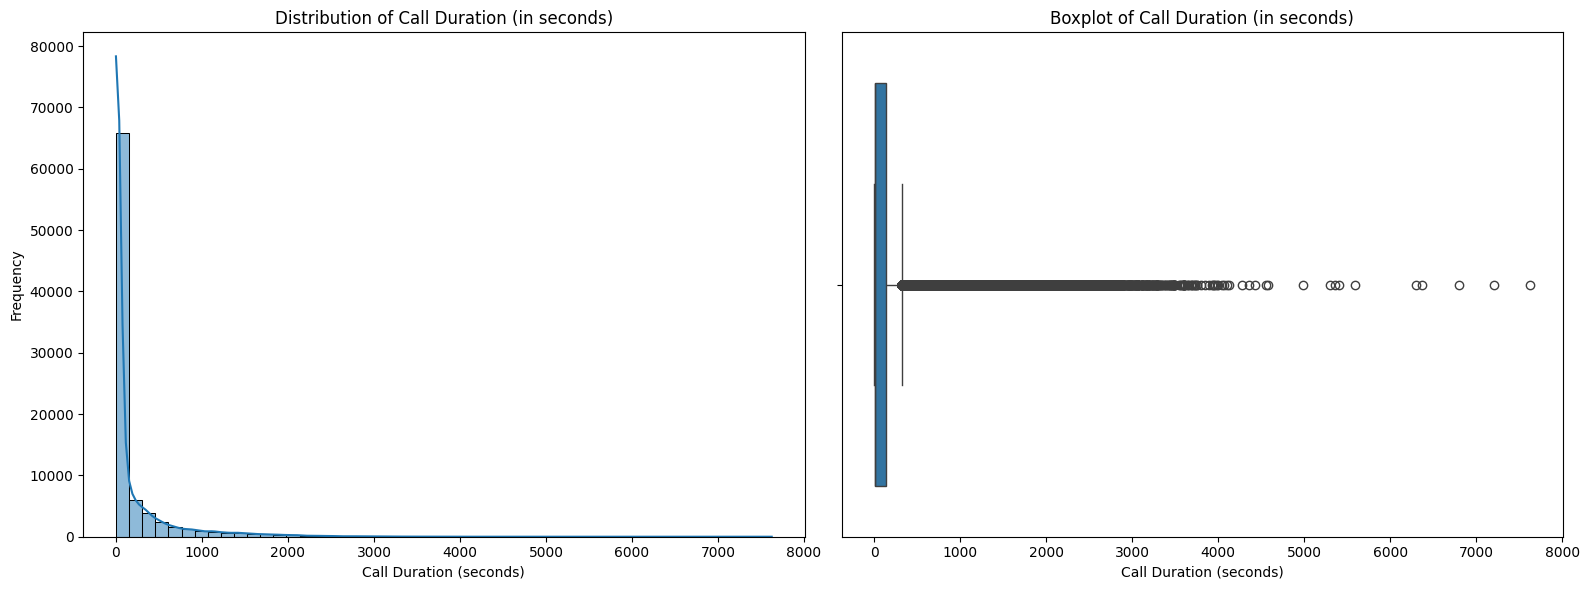

In [ ]:
# Create subplots for histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of call duration
sns.histplot(calls['call_duration_(in_seconds)'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Call Duration (in seconds)')
axes[0].set_xlabel('Call Duration (seconds)')
axes[0].set_ylabel('Frequency')

# Boxplot of call duration
sns.boxplot(x=calls['call_duration_(in_seconds)'], ax=axes[1])
axes[1].set_title('Boxplot of Call Duration (in seconds)')
axes[1].set_xlabel('Call Duration (seconds)')

plt.tight_layout()
plt.show()

In [ ]:
max_call_duration_seconds = calls['call_duration_(in_seconds)'].max()
max_call_duration_minutes = max_call_duration_seconds / 60 / 60
print(f"Максимальная длительность звонка: {max_call_duration_minutes:.2f} Stunden")

Максимальная длительность звонка: 2.12 Stunden


In [ ]:
calls['call_duration_(in_seconds)'].describe()

,call_duration_(in_seconds)
count,86107.000000
mean,182.585771
std,419.276208
min,0.000000
25%,4.000000
50%,10.000000
75%,131.000000
max,7625.000000


Максимальная длительность звонка (7625 секунд) значительно превышает 75-й процентиль (98 секунд) и среднее значение (164.98 секунд). Большое стандартное отклонение (401.41) также указывает на значительный разброс данных, включая наличие очень больших значений.

In [ ]:
long_calls_count = len(calls[calls['call_duration_(in_seconds)'] > 3600])
total_calls_count = len(calls)
percentage_long_calls = (long_calls_count / total_calls_count) * 100

print(f"Количество звонков длительностью более 3600 секунд: {long_calls_count}")
print(f"Общее количество звонков: {total_calls_count}")
print(f"Процент звонков длительностью более 3600 секунд: {percentage_long_calls:.2f}%")

Количество звонков длительностью более 3600 секунд: 42
Общее количество звонков: 86182
Процент звонков длительностью более 3600 секунд: 0.05%


In [ ]:
calls = calls[calls['call_duration_(in_seconds)'] <= 3600]

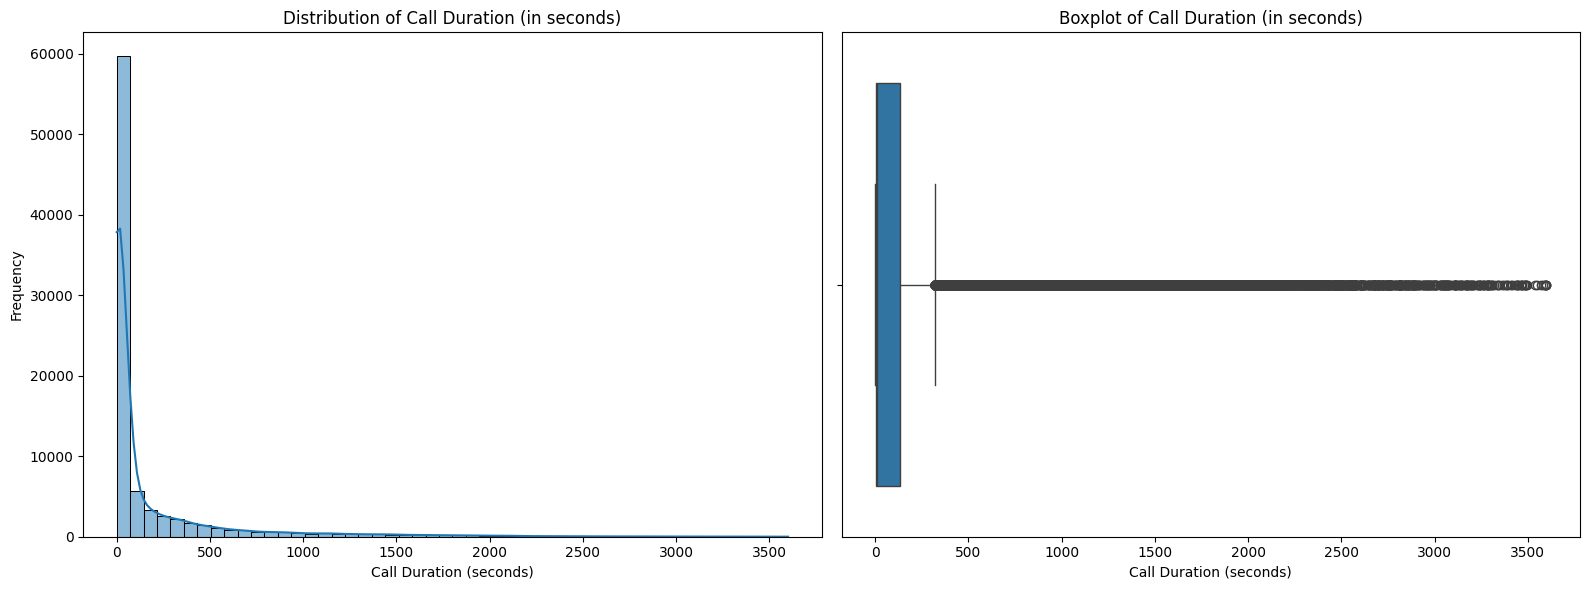

In [ ]:
# Create subplots for histogram and boxplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of call duration
sns.histplot(calls['call_duration_(in_seconds)'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Call Duration (in seconds)')
axes[0].set_xlabel('Call Duration (seconds)')
axes[0].set_ylabel('Frequency')

# Boxplot of call duration
sns.boxplot(x=calls['call_duration_(in_seconds)'], ax=axes[1])
axes[1].set_title('Boxplot of Call Duration (in seconds)')
axes[1].set_xlabel('Call Duration (seconds)')

plt.tight_layout()
plt.show()

In [ ]:
grouped_calls = calls.groupby(['call_start_time', 'contactid'])

anomalous_simultaneous_calls = grouped_calls.filter(lambda x: ('Inbound' in x['call_type'].values) and ('Outbound' in x['call_type'].values))
anomalous_simultaneous_calls = anomalous_simultaneous_calls.sort_values(by=['call_start_time', 'contactid'])

display(anomalous_simultaneous_calls)

,id,call_start_time,call_owner_name,contactid,call_type,call_duration_(in_seconds),call_status,outgoing_call_status,scheduled_in_crm


In [ ]:
anomalous_call_status_counts = anomalous_simultaneous_calls['call_status'].value_counts()
display(anomalous_call_status_counts)

,count
call_status,
Attended Dialled,0
Cancelled,0
Missed,0
Overdue,0
Received,0
Scheduled,0
Scheduled Attended,0
Scheduled Attended Delay,0
Scheduled Unattended,0


/tmp/ipython-input-2077287544.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




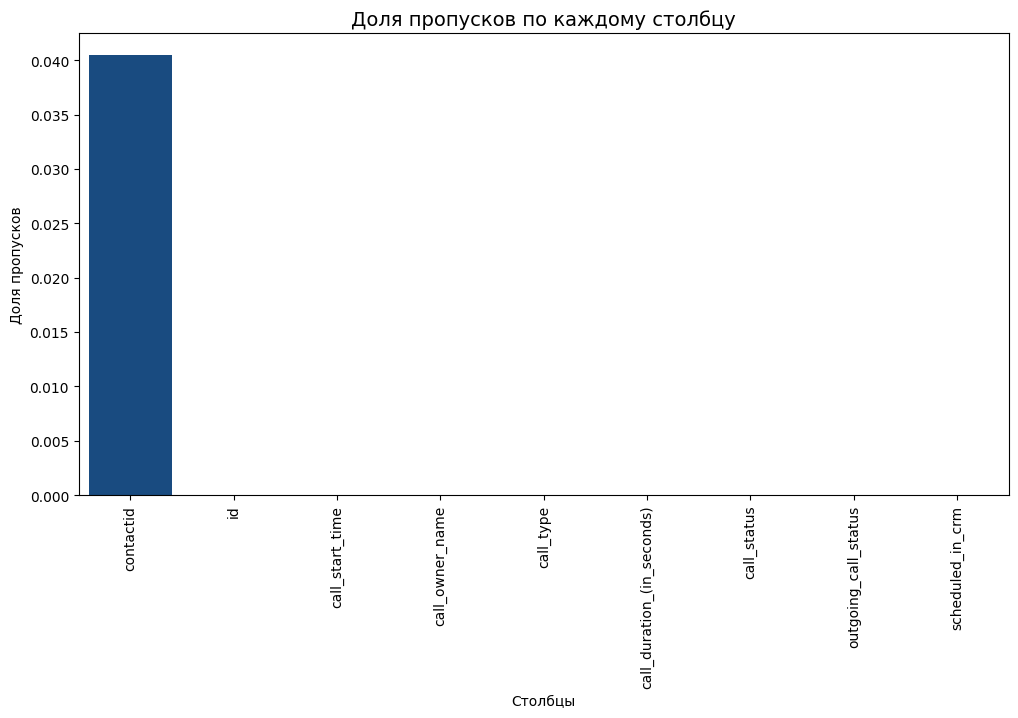

In [ ]:
missing_summary = calls.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_summary.index, y=missing_summary.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Доля пропусков по каждому столбцу", fontsize=14)
plt.ylabel("Доля пропусков")
plt.xlabel("Столбцы")
plt.show()

# **Contacts**

In [ ]:
contacts = pd.read_excel("Contacts (Done).xlsx", dtype={'Id': str})
contacts = clean_cols(contacts)
display(contacts.head(5))

,id,contact_owner_name,created_time,modified_time
0,5805028000000645014,Rachel White,27.06.2023 11:28,22.12.2023 13:34
1,5805028000000872003,Charlie Davis,03.07.2023 11:31,21.05.2024 10:23
2,5805028000000889001,Bob Brown,02.07.2023 22:37,21.12.2023 13:17
3,5805028000000907006,Bob Brown,03.07.2023 05:44,29.12.2023 15:20
4,5805028000000939010,Nina Scott,04.07.2023 10:11,16.04.2024 16:14


In [ ]:
contacts_summary = pd.DataFrame({
    'Data Type': contacts.dtypes,
    'Unique Values': contacts.nunique(),
    'Non-Null Count': contacts.notnull().sum(),
    'Null Count': contacts.isnull().sum(),
    'Null Percentage (%)': (contacts.isnull().sum() / len(calls)) * 100,
    'is Nan': contacts.isna().any(),
    'Is Categorical': (contacts.dtypes == 'object') | (contacts.dtypes == 'category')
})

display(contacts_summary)

,Data Type,Unique Values,Non-Null Count,Null Count,Null Percentage (%),is Nan,Is Categorical
id,object,18548,18548,0,0.0,False,True
contact_owner_name,object,28,18548,0,0.0,False,True
created_time,object,17921,18548,0,0.0,False,True
modified_time,object,16580,18548,0,0.0,False,True


**Удаление дубликатов и неактуальных столбцов.**

In [ ]:
contacts[contacts.duplicated()]

,id,contact_owner_name,created_time,modified_time


**Преобразование типа данных для таких столбцов, как даты и числовые значения.**

In [ ]:
contacts["created_time"] = pd.to_datetime(
    contacts["created_time"], errors="coerce"
)
contacts["modified_time"] = pd.to_datetime(
    contacts["modified_time"], errors="coerce"
)
contacts["contact_owner_name"] = contacts["contact_owner_name"].astype("str")

/tmp/ipython-input-1803023187.py:1: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/tmp/ipython-input-1803023187.py:4: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



**Преобразование данных в столбцах**

In [ ]:
# Check for cases where modified_time is before created_time
incorrect_dates = contacts[contacts['modified_time'] < contacts['created_time']]

if len(incorrect_dates) > 0:
    print("Найдены строки, где Modified Time раньше Created Time:")
    display(incorrect_dates)
else:
    print("Не найдено строк, где Modified Time раньше Created Time.")

Не найдено строк, где Modified Time раньше Created Time.


In [ ]:
calls_with_owner = pd.merge(
    calls,
    contacts[["id", "contact_owner_name"]],
    left_on="contactid",
    right_on="id",
    how="left"
)

calls_by_owner = (
    calls_with_owner["contact_owner_name"]
    .value_counts()
    .reset_index()
)

calls_by_owner.columns = ["contact_owner_name", "number_of_calls"]

display(calls_by_owner)

,contact_owner_name,number_of_calls
0,Ulysses Adams,12085
1,Julia Nelson,9018
2,Charlie Davis,8254
3,Paula Underwood,6385
4,Quincy Vincent,6076
5,Victor Barnes,5657
6,Nina Scott,4709
7,Ben Hall,3855
8,Jane Smith,3338
9,Diana Evans,3104


# **Spend**

In [ ]:
spend = pd.read_excel("Spend (Done).xlsx", )
spend = clean_cols(spend)
display(spend.head(5))

,date,source,campaign,impressions,spend,clicks,adgroup,ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00,0,NaN,NaN
3,2023-07-03,Google Ads,NaN,0,0.00,0,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00,0,NaN,NaN


In [ ]:
spend_summary = pd.DataFrame({
    'Data Type': spend.dtypes,
    'Unique Values': spend.nunique(),
    'Non-Null Count': spend.notnull().sum(),
    'Null Count': spend.isnull().sum(),
    'Null Percentage (%)': (spend.isnull().sum() / len(calls)) * 100,
    'is Nan': spend.isna().any(),
    'Is Categorical': (spend.dtypes == 'object') | (spend.dtypes == 'category')
})

display(spend_summary)

,Data Type,Unique Values,Non-Null Count,Null Count,Null Percentage (%),is Nan,Is Categorical
date,datetime64[ns],355,20779,0,0.000000,False,False
source,object,14,20779,0,0.000000,False,True
campaign,object,51,14785,5994,6.964504,True,True
impressions,int64,4003,20779,0,0.000000,False,False
spend,float64,2859,20779,0,0.000000,False,False
clicks,int64,552,20779,0,0.000000,False,False
adgroup,object,24,13951,6828,7.933539,True,True
ad,object,176,13951,6828,7.933539,True,True


/tmp/ipython-input-3992787537.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




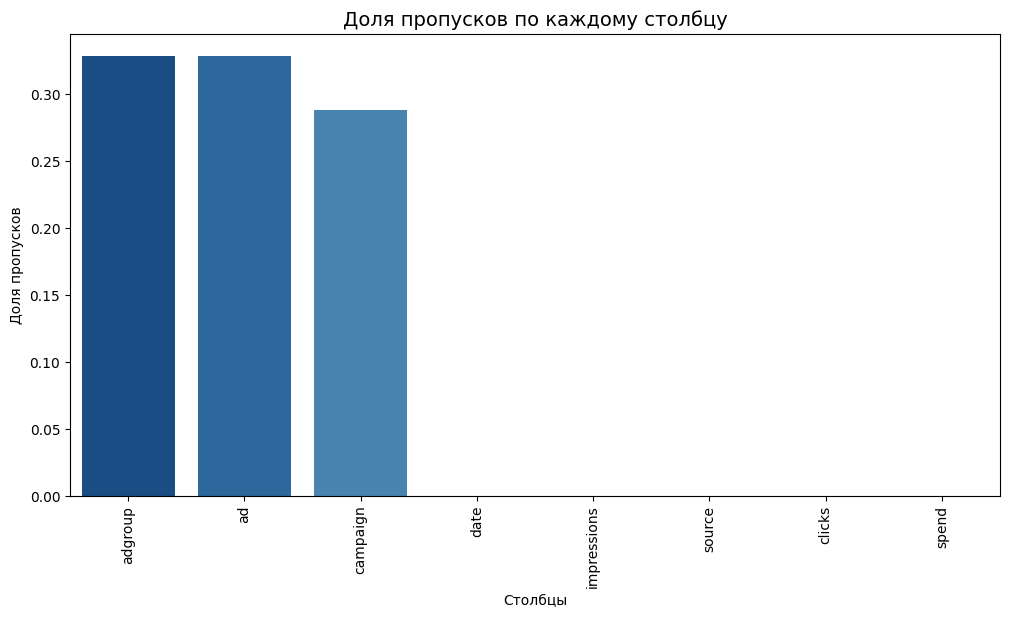

In [ ]:
missing_summary = spend.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_summary.index, y=missing_summary.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Доля пропусков по каждому столбцу", fontsize=14)
plt.ylabel("Доля пропусков")
plt.xlabel("Столбцы")
plt.show()

**Удаление дубликатов и неактуальных столбцов.**

In [ ]:
spend = spend[spend['source'] != 'Test']
display(spend.head())

,date,source,campaign,impressions,spend,clicks,adgroup,ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00,0,NaN,NaN
3,2023-07-03,Google Ads,NaN,0,0.00,0,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00,0,NaN,NaN


In [ ]:
mask_to_drop = (spend['campaign'].isna() | (spend['campaign'] == 'Unknown')) & \
               (spend['adgroup'].isna() | (spend['adgroup'] == 'Unknown')) & \
               (spend['ad'].isna() | (spend['ad'] == 'Unknown')) & \
               (spend['impressions'] == 0) & \
               (spend['spend'] == 0) & \
               (spend['clicks'] == 0)

spend_cleaned = spend[~mask_to_drop]

print(f"Number of rows before dropping: {len(spend)}")
print(f"Number of rows after dropping: {len(spend_cleaned)}")

spend = spend_cleaned

display(spend.head())

Number of rows before dropping: 20517
Number of rows after dropping: 16819


,date,source,campaign,impressions,spend,clicks,adgroup,ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
5,2023-07-03,Facebook Ads,03.07.23women,187,3.30,6,women,b3
6,2023-07-03,Facebook Ads,03.07.23women,4,0.02,1,women,b1
9,2023-07-03,Facebook Ads,02.07.23wide_DE,61,0.58,0,wide,b4


In [ ]:
spend.duplicated()

,0
0,False
1,False
5,False
6,False
9,False
...,...
20771,False
20772,False
20774,False
20775,False


In [ ]:
spend.drop_duplicates()

,date,source,campaign,impressions,spend,clicks,adgroup,ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
5,2023-07-03,Facebook Ads,03.07.23women,187,3.30,6,women,b3
6,2023-07-03,Facebook Ads,03.07.23women,4,0.02,1,women,b1
9,2023-07-03,Facebook Ads,02.07.23wide_DE,61,0.58,0,wide,b4
...,...,...,...,...,...,...,...,...
20771,2024-06-21,Tiktok Ads,22.05.2024wide_DE,7,0.03,0,wide,bloggersvideo18com
20772,2024-06-21,Youtube Ads,youtube_shorts_DE,90,0.51,2,Com_august,bloggersvideo3june
20774,2024-06-21,Facebook Ads,17.03.24wide_AT,7,0.07,0,wide,bloggersvideo16com_at
20775,2024-06-21,Tiktok Ads,12.07.2023wide_DE,61,0.16,0,wide,bloggersvideo14com


**Обработка отсутствующих значений**

In [ ]:
spend['campaign'] = spend['campaign'].fillna('Unknown')
spend['adgroup'] = spend['adgroup'].fillna('Unknown')
spend['ad'] = spend['ad'].fillna('Unknown')

**Преобразование типа данных для таких столбцов, как даты и числовые значения.**

In [ ]:
spend['date'] = pd.to_datetime(spend['date'], errors='coerce')

**Преобразование данных в столбцах**

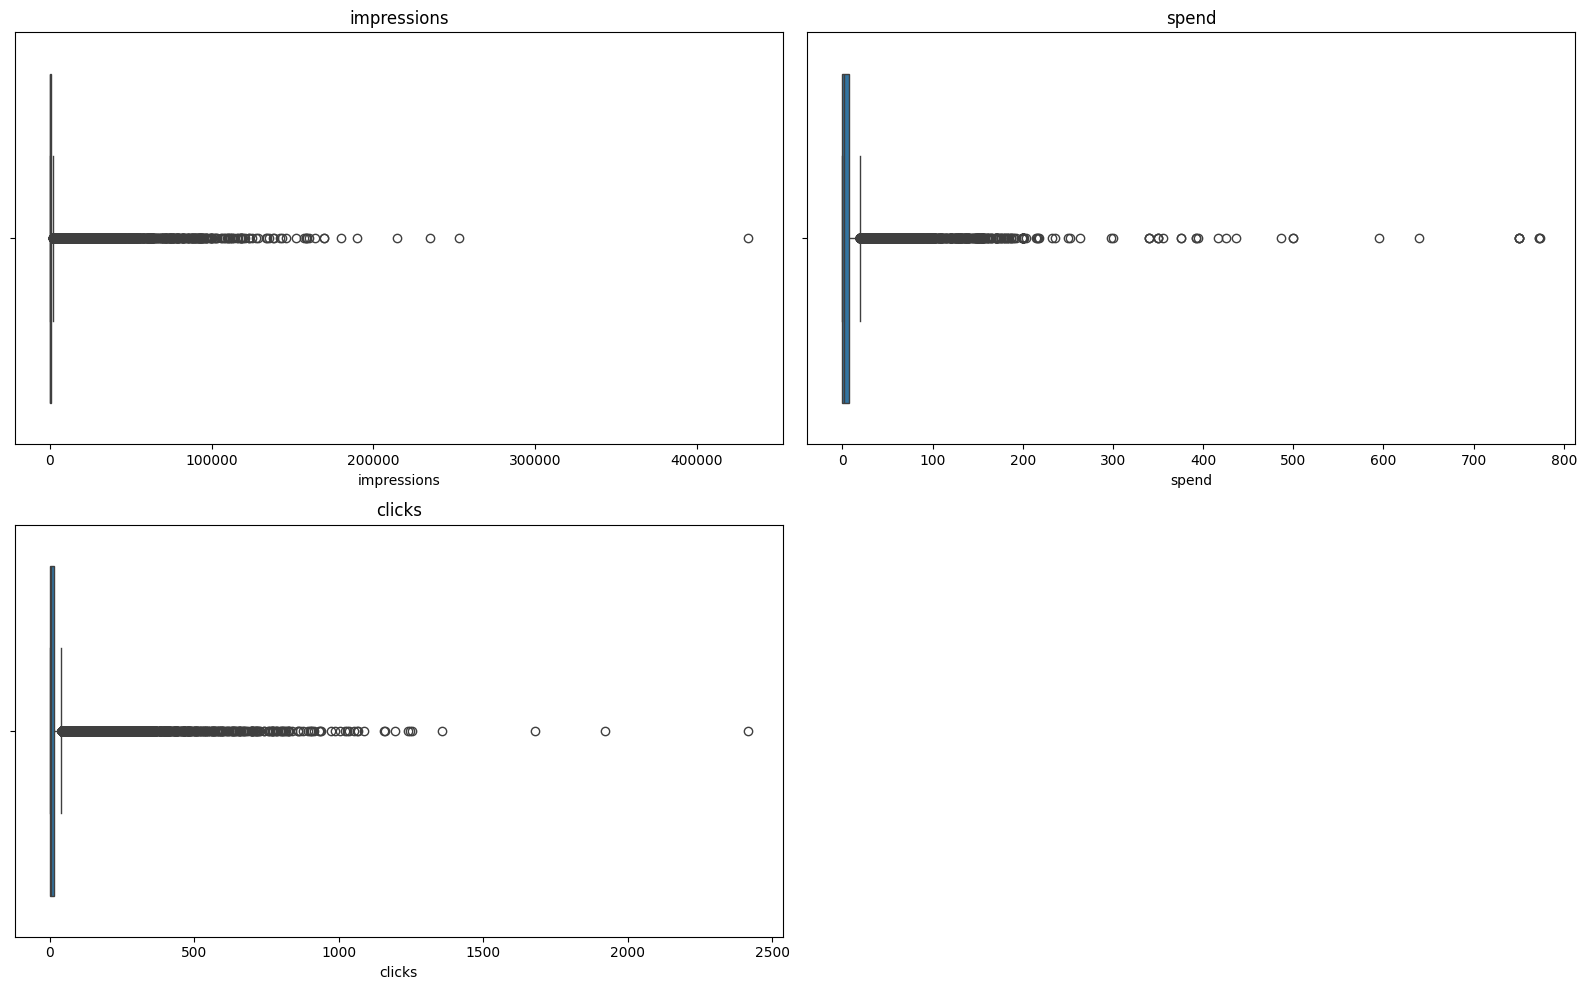

In [ ]:
numerical_cols_spend = spend.select_dtypes(include=np.number).columns
num_numerical_cols = len(numerical_cols_spend)

n_cols = 2
n_rows = (num_numerical_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_spend):
    sns.boxplot(x=spend[col], ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
spend[['impressions', 'spend', 'clicks']].describe()

,impressions,spend,clicks
count,16819.000000,16819.000000,16819.000000
mean,3034.368333,8.853989,29.566264
std,12649.732533,29.494899,93.865151
min,0.000000,0.000000,0.000000
25%,10.000000,0.070000,0.000000
50%,179.000000,1.540000,4.000000
75%,922.000000,7.790000,16.000000
max,431445.000000,774.000000,2415.000000


In [ ]:
numerical_cols_spend = spend.select_dtypes(include=np.number).columns

for col in numerical_cols_spend:
    Q1 = spend[col].quantile(0.25)
    Q3 = spend[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR

    print(f"Для столбца '{col}':")
    print(f"  25-й процентиль (Q1): {Q1}")
    print(f"  75-й процентиль (Q3): {Q3}")
    print(f"  Межквартильный диапазон (IQR): {IQR}")
    print(f"  Верхняя граница для выбросов (Q3 + 1.5 * IQR): {upper_bound:.2f}")
    print("-" * 20)


Для столбца 'impressions':
  25-й процентиль (Q1): 10.0
  75-й процентиль (Q3): 922.0
  Межквартильный диапазон (IQR): 912.0
  Верхняя граница для выбросов (Q3 + 1.5 * IQR): 2290.00
--------------------
Для столбца 'spend':
  25-й процентиль (Q1): 0.07
  75-й процентиль (Q3): 7.79
  Межквартильный диапазон (IQR): 7.72
  Верхняя граница для выбросов (Q3 + 1.5 * IQR): 19.37
--------------------
Для столбца 'clicks':
  25-й процентиль (Q1): 0.0
  75-й процентиль (Q3): 16.0
  Межквартильный диапазон (IQR): 16.0
  Верхняя граница для выбросов (Q3 + 1.5 * IQR): 40.00
--------------------


In [ ]:
numerical_cols_spend = spend.select_dtypes(include=np.number).columns

for col in numerical_cols_spend:
    Q1 = spend[col].quantile(0.25)
    Q3 = spend[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR

    count_above_bound = len(spend[spend[col] > upper_bound])
    total_count = len(spend)
    percentage_above_bound = (count_above_bound / total_count) * 100

    print(f"Для столбца '{col}':")
    print(f"  Верхняя граница для выбросов (Q3 + 1.5 * IQR): {upper_bound:.2f}")
    print(f"  Количество строк со значением выше {upper_bound:.2f}: {count_above_bound}")
    print(f"  Процент строк со значением выше {upper_bound:.2f}: {percentage_above_bound:.2f}%")
    print("-" * 20)

Для столбца 'impressions':
  Верхняя граница для выбросов (Q3 + 1.5 * IQR): 2290.00
  Количество строк со значением выше 2290.00: 2374
  Процент строк со значением выше 2290.00: 14.11%
--------------------
Для столбца 'spend':
  Верхняя граница для выбросов (Q3 + 1.5 * IQR): 19.37
  Количество строк со значением выше 19.37: 1356
  Процент строк со значением выше 19.37: 8.06%
--------------------
Для столбца 'clicks':
  Верхняя граница для выбросов (Q3 + 1.5 * IQR): 40.00
  Количество строк со значением выше 40.00: 2047
  Процент строк со значением выше 40.00: 12.17%
--------------------


In [ ]:
filtered_spend = spend[
    (spend['impressions'] > 1772.50) &
    (spend['spend'] > 14.38) &
    (spend['clicks'] > 30.00)
]

display(filtered_spend)

,date,source,campaign,impressions,spend,clicks,adgroup,ad
47,2023-07-05,Google Ads,performancemax_eng_DE,12729,42.40,324,Unknown,Unknown
78,2023-07-06,Google Ads,performancemax_eng_DE,22171,39.11,393,Unknown,Unknown
146,2023-07-08,Google Ads,performancemax_eng_DE,12723,32.22,463,Unknown,Unknown
193,2023-07-09,Google Ads,performancemax_eng_DE,9846,24.45,416,Unknown,Unknown
208,2023-07-10,Google Ads,performancemax_eng_DE,12337,25.22,334,Unknown,Unknown
...,...,...,...,...,...,...,...,...
20619,2024-06-19,Google Ads,performancemax_eng_DE,13227,76.80,185,Unknown,Unknown
20647,2024-06-20,Google Ads,performancemax_eng_DE,11224,76.36,141,Unknown,Unknown
20654,2024-06-20,Google Ads,performancemax_wide_AT,27241,48.47,141,Unknown,Unknown
20679,2024-06-20,Youtube Ads,youtube_shorts_DE,6801,22.82,32,Com_august,bloggersvideo2june


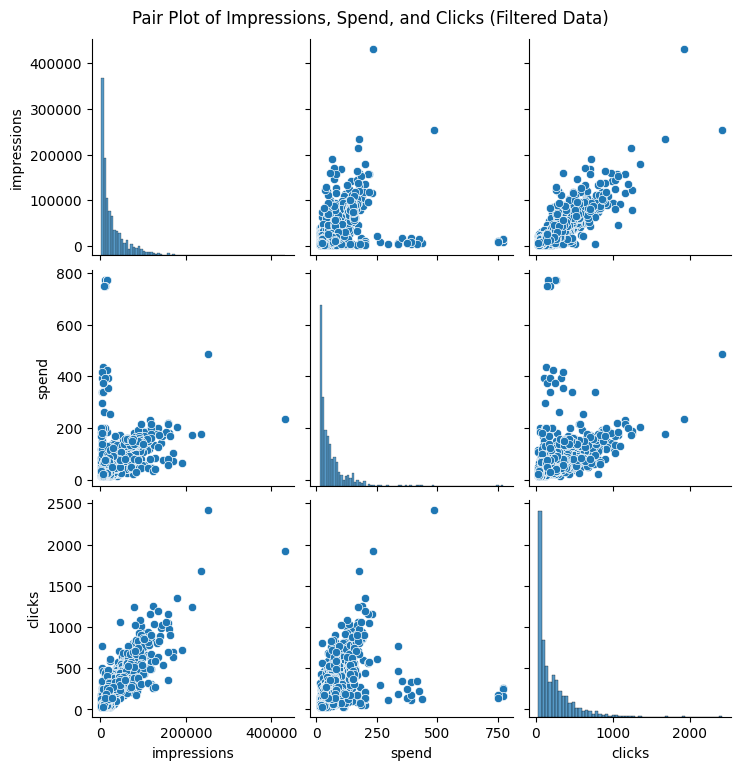

In [ ]:
sns.pairplot(filtered_spend[['impressions', 'spend', 'clicks']])
plt.suptitle('Pair Plot of Impressions, Spend, and Clicks (Filtered Data)', y=1.02)
plt.show()

In [ ]:
# Filter for high impressions
spend_impres_max = spend[spend['impressions'] > 170000]
print(f"Количество строк с impressions > 170000: {len(spend_impres_max)}")
print("Строки с impressions > 170000:")
display(spend_impres_max.head())

# Filter for high spend
spend_spend_max = spend[spend['spend'] > 300]
print(f"\nКоличество строк с spend > 300: {len(spend_spend_max)}")
print("\nСтроки с spend > 300:")
display(spend_spend_max.head())

# Filter for high clicks
spend_clicks_max = spend[spend['clicks'] > 1300]
print(f"\nКоличество строк с clicks > 1300: {len(spend_clicks_max)}")
print("\nСтроки с clicks > 1300:")
display(spend_clicks_max.head())

Количество строк с impressions > 170000: 6
Строки с impressions > 170000:


,date,source,campaign,impressions,spend,clicks,adgroup,ad
926,2023-07-27,Google Ads,performancemax_eng_DE,252824,486.77,2415,Unknown,Unknown
1243,2023-08-02,Google Ads,performancemax_eng_DE,180251,203.23,1357,Unknown,Unknown
2924,2023-09-03,Google Ads,performancemax_eng_DE,431445,236.10,1920,Unknown,Unknown
11416,2024-02-14,Google Ads,performancemax_eng_DE,234984,176.03,1680,Unknown,Unknown
13454,2024-03-23,Google Ads,performancemax_eng_DE,214875,172.66,1239,Unknown,Unknown



Количество строк с spend > 300: 27

Строки с spend > 300:


,date,source,campaign,impressions,spend,clicks,adgroup,ad
926,2023-07-27,Google Ads,performancemax_eng_DE,252824,486.77,2415,Unknown,Unknown
4787,2023-10-05,Bloggers,Unknown,4301,340.00,769,Unknown,Unknown
5065,2023-10-10,Bloggers,Unknown,9797,773.00,257,Unknown,Unknown
6666,2023-11-14,Bloggers,Unknown,5878,340.00,465,Unknown,Unknown
6841,2023-11-18,Webinar,blog2_DE,16100,773.00,249,Unknown,Unknown



Количество строк с clicks > 1300: 4

Строки с clicks > 1300:


,date,source,campaign,impressions,spend,clicks,adgroup,ad
926,2023-07-27,Google Ads,performancemax_eng_DE,252824,486.77,2415,Unknown,Unknown
1243,2023-08-02,Google Ads,performancemax_eng_DE,180251,203.23,1357,Unknown,Unknown
2924,2023-09-03,Google Ads,performancemax_eng_DE,431445,236.10,1920,Unknown,Unknown
11416,2024-02-14,Google Ads,performancemax_eng_DE,234984,176.03,1680,Unknown,Unknown


In [ ]:
spend = spend[
    (spend["impressions"] <= 170_000)
    & (spend["spend"] <= 300)
    & (spend["clicks"] <= 1_300)
]

display(spend.head())

,date,source,campaign,impressions,spend,clicks,adgroup,ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,Unknown,Unknown
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,Unknown,Unknown
5,2023-07-03,Facebook Ads,03.07.23women,187,3.30,6,women,b3
6,2023-07-03,Facebook Ads,03.07.23women,4,0.02,1,women,b1
9,2023-07-03,Facebook Ads,02.07.23wide_DE,61,0.58,0,wide,b4


In [ ]:
missing_summary = spend.isnull().mean().sort_values(ascending=False)
missing = missing_summary[missing_summary > 0]

if missing.empty:
    print("Пропуски отсутствуют")
else:
    missing_df = missing.reset_index()
    missing_df.columns = ['Column', 'Missing Values']

    fig = px.bar(
        missing_df,
        x='Column',
        y='Missing Values',
        title='Количество пропусков по числовым колонкам (без contactid)',
        text='Missing Values',
        color='Missing Values',
        color_continuous_scale='Reds'
    )

    fig.update_traces(textposition='outside')
    fig.update_layout(
        xaxis_title='Колонка',
        yaxis_title='Количество пропусков',
        width=900,
        height=500
    )
    fig.show()

Пропуски отсутствуют


# **Deals**

In [ ]:
deals = pd.read_excel("Deals (Done).xlsx",dtype={'Id': str, 'Contact Name': str})
deals = clean_cols(deals)
display(deals.head(5))

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch
0,5805028000056864695,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,...,NaN,NaN,21.06.2024 15:30,NaN,NaN,NaN,NaN,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,Web Developer,Morning,21.06.2024 15:23,6.0,NaN,0,2000,5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,NaN,NaN,21.06.2024 14:45,NaN,NaN,NaN,NaN,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,NaN,NaN,21.06.2024 13:32,NaN,NaN,NaN,NaN,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,NaN,NaN,21.06.2024 13:21,NaN,NaN,NaN,NaN,5805028000056876176,NaN,NaN


In [ ]:
deals_summary = pd.DataFrame({
    'Data Type': deals.dtypes,
    'Unique Values': deals.nunique(),
    'Non-Null Count': deals.notnull().sum(),
    'Null Count': deals.isnull().sum(),
    'Null Percentage (%)': (deals.isnull().sum() / len(deals)) * 100,
    'is Nan': deals.isna().any(),
    'Is Categorical': (deals.dtypes == 'object') | (deals.dtypes == 'category')
})

display(deals_summary)

,Data Type,Unique Values,Non-Null Count,Null Count,Null Percentage (%),is Nan,Is Categorical
id,object,21593,21593,2,0.009261,True,True
deal_owner_name,object,27,21564,31,0.143552,True,True
closing_date,object,359,14645,6950,32.183376,True,True
quality,object,6,19340,2255,10.442232,True,True
stage,object,13,21593,2,0.009261,True,True
lost_reason,object,21,16124,5471,25.334568,True,True
page,object,34,21593,2,0.009261,True,True
campaign,object,154,16067,5528,25.598518,True,True
sla,object,13357,15533,6062,28.071313,True,True
content,object,187,14147,7448,34.489465,True,True


/tmp/ipython-input-4054521668.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




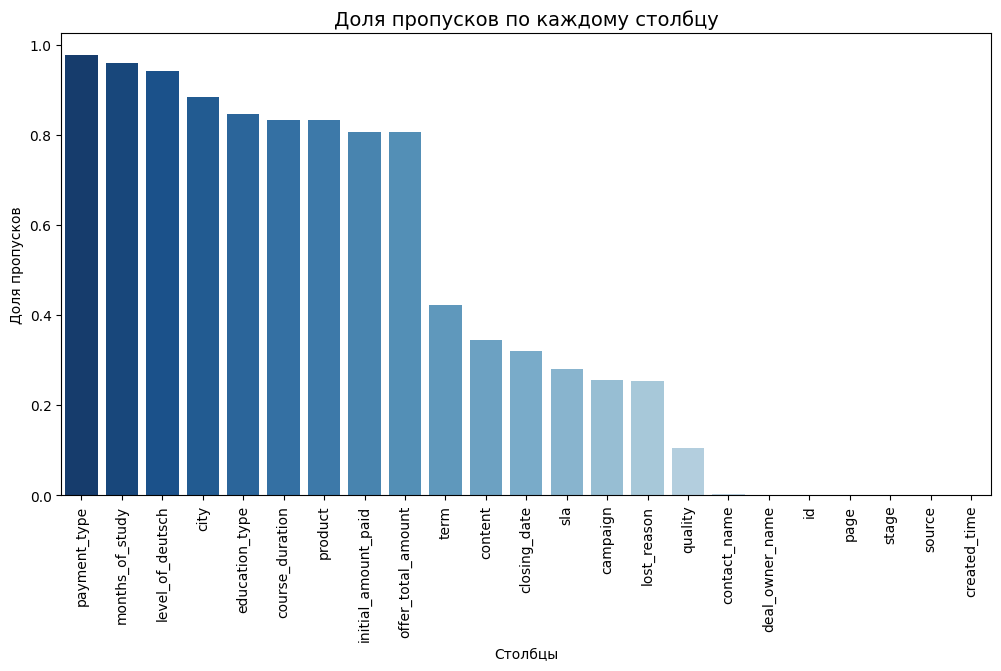

In [ ]:
missing_summary = deals.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_summary.index, y=missing_summary.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Доля пропусков по каждому столбцу", fontsize=14)
plt.ylabel("Доля пропусков")
plt.xlabel("Столбцы")
plt.show()

**Преобразование типа данных для таких столбцов, как даты и числовые значения.**

In [ ]:
deals["offer_total_amount"] = pd.to_numeric(
    deals["offer_total_amount"], errors="coerce"
)
deals["initial_amount_paid"] = pd.to_numeric(
    deals["initial_amount_paid"], errors="coerce"
)
deals["created_time"] = pd.to_datetime(
    deals["created_time"], errors="coerce"
)
deals["closing_date"] = pd.to_datetime(
    deals["closing_date"], errors="coerce"
)

/tmp/ipython-input-232152357.py:7: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/tmp/ipython-input-232152357.py:10: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



**Обработка отсутствующих значений**

In [ ]:
for c in deals.select_dtypes(include=['object']).columns:
    deals[c] = deals[c].fillna('Unknown')

In [ ]:
deals['id'].value_counts()

,count
id,
Unknown,2
5805028000021068299,1
5805028000021061349,1
5805028000021088390,1
5805028000021066526,1
...,...
5805028000039898425,1
5805028000039945483,1
5805028000039891345,1


**Удаление дубликатов и неактуальных столбцов.**

In [ ]:
deals = deals.drop_duplicates()

In [ ]:
deals[deals.duplicated()]

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch


In [ ]:
deals['source'].value_counts()

,count
source,
Facebook Ads,4850
Google Ads,4226
Organic,2590
Tiktok Ads,2051
SMM,1730
Youtube Ads,1657
CRM,1656
Bloggers,1089
Telegram posts,1001


In [ ]:
deals = deals[deals['id'] != 'Unknown']

In [ ]:
 deals = deals[deals['source'] != 'Test']

In [ ]:
deals = deals[deals['product'] != 'Unknown']

In [ ]:
deals = deals[deals['stage'] != 'Test Sent']

In [ ]:
deals['payment_type'].value_counts()

,count
payment_type,
Unknown,3073
Recurring Payments,348
One Payment,138
Reservation,5


In [ ]:
deals[deals['product'] == 'Unknown']

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch


In [ ]:
deals = deals[deals['lost_reason'] != 'Duplicate']
display(deals.head())

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,Unknown,Unknown,...,Web Developer,Morning,2024-06-21 15:23:00,6.0,NaN,0.0,2000.0,5805028000056834471,Unknown,Unknown
21,5805028000056859153,Ben Hall,NaT,B - Medium,Qualificated,Unknown,/at-eng,engwien_AT,01:02:25,b1-at,...,Web Developer,Unknown,2024-06-21 10:36:00,6.0,NaN,NaN,NaN,5805028000056889019,Unknown,Unknown
56,5805028000056683030,Charlie Davis,NaT,C - Low,Waiting For Payment,Unknown,/eng/test,performancemax_eng_DE,00:20:39,_{region_name}_,...,Web Developer,Morning,2024-06-20 12:34:00,6.0,NaN,1000.0,9000.0,5805028000056690015,Crailsheim,Unknown
60,5805028000056558351,Ulysses Adams,NaT,C - Low,Waiting For Payment,Unknown,/eng,Unknown,00:09:49,Unknown,...,Web Developer,Morning,2024-06-20 11:16:00,6.0,NaN,1000.0,9000.0,5805028000056578244,Dortmund,в1
63,5805028000056575242,Ben Hall,NaT,Unknown,Need a consultation,Unknown,/eng,02.07.23wide_DE,01:30:50,bloggersvideo23com,...,Digital Marketing,Unknown,2024-06-20 09:26:00,11.0,NaN,NaN,NaN,5805028000008812393,Unknown,Unknown


In [ ]:
product_counts = deals['product'].value_counts()
display(product_counts)

,count
product,
Digital Marketing,1942
UX/UI Design,999
Web Developer,564
Find yourself in IT,3
Data Analytics,1


In [ ]:
deals = deals[
    ~deals["product"].isin(["Find yourself in IT", "Data Analytics"])
]

display(deals.head())

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,Unknown,Unknown,...,Web Developer,Morning,2024-06-21 15:23:00,6.0,NaN,0.0,2000.0,5805028000056834471,Unknown,Unknown
21,5805028000056859153,Ben Hall,NaT,B - Medium,Qualificated,Unknown,/at-eng,engwien_AT,01:02:25,b1-at,...,Web Developer,Unknown,2024-06-21 10:36:00,6.0,NaN,NaN,NaN,5805028000056889019,Unknown,Unknown
56,5805028000056683030,Charlie Davis,NaT,C - Low,Waiting For Payment,Unknown,/eng/test,performancemax_eng_DE,00:20:39,_{region_name}_,...,Web Developer,Morning,2024-06-20 12:34:00,6.0,NaN,1000.0,9000.0,5805028000056690015,Crailsheim,Unknown
60,5805028000056558351,Ulysses Adams,NaT,C - Low,Waiting For Payment,Unknown,/eng,Unknown,00:09:49,Unknown,...,Web Developer,Morning,2024-06-20 11:16:00,6.0,NaN,1000.0,9000.0,5805028000056578244,Dortmund,в1
63,5805028000056575242,Ben Hall,NaT,Unknown,Need a consultation,Unknown,/eng,02.07.23wide_DE,01:30:50,bloggersvideo23com,...,Digital Marketing,Unknown,2024-06-20 09:26:00,11.0,NaN,NaN,NaN,5805028000008812393,Unknown,Unknown


**Преобразование данных в столбцах**

In [ ]:
mask = deals["initial_amount_paid"] > deals["offer_total_amount"]

deals.loc[mask, ["initial_amount_paid", "offer_total_amount"]] = (
    deals.loc[mask, ["offer_total_amount", "initial_amount_paid"]].values
)

display(deals[mask])

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch
1393,5805028000053561185,Cara Iverson,2024-06-07,D - Non Target,Lost,Non target,/eng,Berlin_DE,05:42:51,b6,...,UX/UI Design,Morning,2024-06-05 08:50:00,11.0,NaN,11000.0,11500.0,5805028000053534166,Zwickau,Unknown
1409,5805028000053462041,Charlie Davis,NaT,D - Non Target,Lost,Gutstein refusal,/eng,performancemax_eng_DE,13:22:11,_{region_name}_,...,UX/UI Design,Morning,2024-06-04 21:24:00,11.0,NaN,11000.0,11500.0,5805028000053471005,Aschaffenburg,Б2
1440,5805028000053242748,Cara Iverson,NaT,A - High,Waiting For Payment,Unknown,/direct,blog2_DE,00:39:03,Unknown,...,UX/UI Design,Morning,2024-06-04 12:48:00,11.0,NaN,11000.0,11500.0,5805028000053244895,Straubing,Unknown
1452,5805028000053242571,Quincy Vincent,2024-06-05,D - Non Target,Lost,Non target,/eng,Live_DE,00:18:50,b0,...,UX/UI Design,Morning,2024-06-04 11:13:00,11.0,NaN,11000.0,11500.0,5805028000053279736,Augsburg,Unknown
1703,5805028000052969001,Cara Iverson,NaT,C - Low,Waiting For Payment,Unknown,/direct,blog2_DE,13:59:50,Unknown,...,UX/UI Design,Morning,2024-05-31 21:07:00,11.0,NaN,11000.0,11500.0,5805028000052893037,Perleberg,Unknown
1967,5805028000052197344,Ulysses Adams,2024-05-28,A - High,Lost,Changed Decision,/eng,performancemax_eng_DE,01:45:39,_{region_name}_,...,Web Developer,Morning,2024-05-28 12:34:00,6.0,NaN,2500.0,3000.0,5805028000052194148,Kempten,Unknown
2060,5805028000051885327,Cara Iverson,NaT,A - High,Waiting For Payment,Unknown,/eng,22.05.2024wide_DE,02:44:09,bloggersvideo18com,...,UX/UI Design,Morning,2024-05-26 11:02:00,11.0,NaN,11000.0,11500.0,5805028000051865476,Essen,Unknown
2324,5805028000050859250,Cara Iverson,NaT,C - Low,Lost,Unknown,/eng/test,24.09.23retargeting_DE,02:47:44,v15,...,UX/UI Design,Morning,2024-05-20 09:49:00,11.0,NaN,11000.0,11500.0,5805028000050802254,Buxtehude,в1
2438,5805028000050451253,Paula Underwood,NaT,A - High,Waiting For Payment,Unknown,/eng,youtube_shorts_DE,"2 days, 22:34:32",bloggersvideo10,...,Digital Marketing,Morning,2024-05-17 15:12:00,11.0,NaN,3000.0,3500.0,5805028000050451221,Rohrdorf,Unknown
2759,5805028000049558326,Cara Iverson,NaT,C - Low,Payment Done,Unknown,/eng/test,07.07.23LAL_DE,03:08:07,bloggersvideo8com,...,UX/UI Design,Morning,2024-05-12 16:42:00,11.0,2.0,11000.0,11500.0,5805028000049568134,-,в1


In [ ]:
remaining_incorrect_swaps = deals[
    deals["initial_amount_paid"] > deals["offer_total_amount"]
]

if len(remaining_incorrect_swaps) > 0:
    print(
        "Найдены строки, где initial_amount_paid "
        "все еще больше offer_total_amount:"
    )
    display(remaining_incorrect_swaps)
else:
    print(
        "Все значения initial_amount_paid меньше "
        "или равны offer_total_amount."
    )

Все значения initial_amount_paid меньше или равны offer_total_amount.


In [ ]:
mode_values = deals.groupby("contact_name")["city"].agg(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# Fill missing 'city' values using the calculated mode for each 'contact_name'
deals["city"] = deals.apply(
    lambda row: mode_values.get(row["contact_name"], row["city"])
    if pd.isna(row["city"])
    else row["city"],
    axis=1,
)

display(deals.head())

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,Unknown,Unknown,...,Web Developer,Morning,2024-06-21 15:23:00,6.0,NaN,0.0,2000.0,5805028000056834471,Unknown,Unknown
21,5805028000056859153,Ben Hall,NaT,B - Medium,Qualificated,Unknown,/at-eng,engwien_AT,01:02:25,b1-at,...,Web Developer,Unknown,2024-06-21 10:36:00,6.0,NaN,NaN,NaN,5805028000056889019,Unknown,Unknown
56,5805028000056683030,Charlie Davis,NaT,C - Low,Waiting For Payment,Unknown,/eng/test,performancemax_eng_DE,00:20:39,_{region_name}_,...,Web Developer,Morning,2024-06-20 12:34:00,6.0,NaN,1000.0,9000.0,5805028000056690015,Crailsheim,Unknown
60,5805028000056558351,Ulysses Adams,NaT,C - Low,Waiting For Payment,Unknown,/eng,Unknown,00:09:49,Unknown,...,Web Developer,Morning,2024-06-20 11:16:00,6.0,NaN,1000.0,9000.0,5805028000056578244,Dortmund,в1
63,5805028000056575242,Ben Hall,NaT,Unknown,Need a consultation,Unknown,/eng,02.07.23wide_DE,01:30:50,bloggersvideo23com,...,Digital Marketing,Unknown,2024-06-20 09:26:00,11.0,NaN,NaN,NaN,5805028000008812393,Unknown,Unknown


In [ ]:
mode_values = deals.groupby("contact_name")["level_of_deutsch"].agg(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

deals["level_of_deutsch"] = deals["contact_name"].map(mode_values)

In [ ]:
unique_deutsch_levels = deals['level_of_deutsch'].unique()
print("Уникальные значения в столбце 'level_of_deutsch':")
display(unique_deutsch_levels)

Уникальные значения в столбце 'level_of_deutsch':


array(['Unknown', 'в1', 'A2', 'б1', 'b1', 'B1', 'в1-в2', 'B2', 'C2', 'с1',
       'Б1', 'b1 ждет результаты', 'а2', 'а1', 'а0', 'б2', 'Б2', 'В1',
       'А2', 'B1 будет в феврале 2025',
       'Detmold, Paulinenstraße 95, 32756',
       'Сам оценивает на B2, 13 лет живет в Германии', 'в2', 'В1-В2',
       'А2-В1',
       'lэкзамен - 6 июля на В1. курсы вечером (но уверенно говорит на B1)',
       'Гражданка Германии уже год в Германии Учит немецкий и в сентябре b1 через гос-во проходит, а не через ДЖЦ, вечером учится 3 р в неделю с 18 до 21',
       '-', 'А2 ( Б1 в июне)', 'B1 в процессе обучения',
       'ЯЗ: нем В1 был экз 03.05 повтор и сейчас ждет результаты. Технический англ был. А1 сейчас. ОБР: 2 во информационные и комп сети - инженер системоте',
       'С1', 0, 'Ждем B1', 'А1 сертиф, но по факту А2', 'a2',
       'Пока А2, сдает 17 05 B1', 'окончание 13.06 курса на b1', 'A1',
       'b2', 'Thorn-Prikker-Str. 30, Hagen, 58093', 'В2',
       'нулевой уровень, только пошел на курс

In [ ]:
deutsch_level_mapping = {
    # === A0 ===
    'A0': 'A0', 'a0': 'A0', 'a0-a1': 'A0',
    'ня-0, но англ B2+': 'A0', 'не учил': 'A0',
    'никакой': 'A0', 'разговорный из украины, без сертификата': 'A0',

    # === A1 ===
    'A1': 'A1', 'а1': 'A1', 'A1-A2': 'A1',
    'а1-а2 , ая свободный': 'A1', 'идет на А1': 'A1',

    # === A2 ===
    'A2': 'A2', 'а2': 'A2', 'А2': 'A2', 'A2+': 'A2', 'А2+': 'A2',
    'А2-В1': 'A2', 'а2-в1': 'A2', 'А2 ( Б1 в июне)': 'A2',
    'А2( включили нем в ангебот)': 'A2', 'сдавала А2 в сентябре': 'A2',
    'Пока А2, сдает 17 05 B1': 'A2', 'а2 (б1 в сер января)': 'A2',
    'А2 ( повтор на Б1)': 'A2', 'А2, в процессе Б1': 'A2',
    'А2(ждет итоги Б1)': 'A2', 'А2 нем -В2 англ': 'A2',
    'А2 (В1 с 3 раза не сдала, бератер видела наши доки)': 'A2',
    'А2 ( скоро екзамен)': 'A2', 'А2 ( Б1 март )': 'A2',
    'А2 (весной - еще 300 часов В1)': 'A2', 'А2 ( хочет просить совмещать)': 'A2',
    'А2 (заканчив В1 в июне)': 'A2', 'a2 (b1 экзамен 15 июня)': 'A2',
    'А2 (сдает B1 - 12 дек) - не сдал!': 'A2', 'А2-В1 учит': 'A2',
    'А2(Б1 в марте экз)': 'A2', 'а2 (сдавала экз В1, но не сдала похоже)': 'A2',
    'ня а2, ая в1': 'A2', 'A2 (идет на В1)': 'A2',

    # === B1 ===
    'B1': 'B1', 'б1': 'B1', 'в1': 'B1', 'b1': 'B1',
    'B1 в процессе обучения': 'B1', 'В1': 'B1', 'Б1': 'B1',
    'Ждем B1': 'B1', 'в1 , хочет совмещать с в2': 'B1',
    'Б1 ( проходит Б2)': 'B1', 'ждем B1': 'B1', 'b1 (B2 ждет серт)': 'B1',
    'B1 еще нет результата': 'B1', 'Учиться до сентября на B1': 'B1',
    'b1+': 'B1', 'b1 9ждет экзамен)': 'B1', 'Ждет результат по B1': 'B1',
    'b1 (b2 в июле экзамен)': 'B1', 'Ждет со дня на день В1': 'B1',
    'окончание 13.06 курса на b1': 'B1', 'Б1 ( ждет Б2)': 'B1',
    'Б1-Б2': 'B1', 'b1 ждет серт на днях на руки': 'B1',
    'b1 24 февраля экзамен, англ b2': 'B1', 'b1 (b2 15 марта экзамен)': 'B1',
    'Б1 ( ждет итог Б2)': 'B1', 'будет B1 в июне': 'B1',
    'Б1 ( учит Б2)': 'B1', 'B1 (B2 должна до конца февраля получить)': 'B1',
    'В1, может уже В2?': 'B1', 'b1 ждет результаты': 'B1',
    'Б1( может будет)': 'B1', 'b1 (b2 экзамен 2 марта)': 'B1',
    'b1 (b2 не сдал экзамен)': 'B1', 'B1 вроде был (18 лет назад сдавал)': 'B1',
    'Ждет B1': 'B1', 'Б1 ( ждет результат Б2)': 'B1',
    'В1 (учится на В2 уже)': 'B1', 'в1-ня , в1-ая': 'B1',
    'b1 должна получить результаты в феврале': 'B1',
    'b1 результат экзамена в феврале': 'B1',

    # === B2 ===
    'B2': 'B2', 'б2': 'B2', 'В2': 'B2', 'Б2': 'B2',
    'B2+': 'B2', 'б2+': 'B2', 'B2-C1': 'B2', 'в2-с1': 'B2',
    'Б2-С1': 'B2', 'B2-C2': 'B2', 'b2 (с1 экзамен 16 февраля)': 'B2',
    'Б2( 16.02 экзамен С1)': 'B2', 'Б2 ( учит С1)': 'B2',
    'B2 (говорит без проблем - давно здесь)': 'B2',
    '5 июля 2024 сдает экз на В2': 'B2', 'b2 ждет серт': 'B2',
    'B2 (ждет итог экзамена)': 'B2', 'В2 - не сдал': 'B2',

    # === C1 ===
    'C1': 'C1', 'с1': 'C1', 'С1': 'C1',
    'С1 -ая , Ня -а1': 'C1',

    # === C2 ===
    'C2': 'C2', 'С2': 'C2',

    # === Unknown / прочее ===
    '-': 'Unknown', '?': 'Unknown', 0: 'Unknown',
    'Unknown': 'Unknown', np.nan: 'Unknown',
    'Detmold, Paulinenstraße 95, 32756': 'Unknown',
    'Thorn-Prikker-Str. 30, Hagen, 58093': 'Unknown',
    'Lichtenfelser Straße 25, Untersiemau 96253': 'Unknown',
    'f2': 'Unknown', '.': 'Unknown', 'УТОЧНИТЬ': 'Unknown',
    'гражданка': 'Unknown', 'Гражданин': 'Unknown',
    '25 лет живет в Германии': 'Unknown',
    'В': 'Unknown', 'A': 'Unknown', 'C': 'Unknown',
    'точно уровень не знаю, но говорить могу - учила сама': 'Unknown',
    'УТОЧНИТЬ!': 'Unknown',
}

In [ ]:
# Apply the mapping to create the standardized column
deals["level_of_deutsch_standardized"] = deals["level_of_deutsch"].map(
    deutsch_level_mapping
)

# Fill any remaining NaNs in the standardized column with 'Unknown'
deals["level_of_deutsch_standardized"] = deals["level_of_deutsch_standardized"].fillna(
    "Unknown"
)

display(deals[["level_of_deutsch", "level_of_deutsch_standardized"]].head())

,level_of_deutsch,level_of_deutsch_standardized
1,Unknown,Unknown
21,Unknown,Unknown
56,Unknown,Unknown
60,в1,B1
63,Unknown,Unknown


In [ ]:
deals = deals.drop(columns=['level_of_deutsch'])

In [ ]:
unique_standardized_levels = deals["level_of_deutsch_standardized"].unique()

print("Уникальные значения в стандартизированном столбце 'level_of_deutsch':")
display(unique_standardized_levels)

Уникальные значения в стандартизированном столбце 'level_of_deutsch':


array(['Unknown', 'B1', 'A2', 'B2', 'C2', 'C1', 'A1', 'A0'], dtype=object)

In [ ]:
level_deutsch_counts = deals['level_of_deutsch_standardized'].value_counts()
display(level_deutsch_counts)

,count
level_of_deutsch_standardized,
Unknown,2519
B1,699
A2,121
B2,121
C1,24
A1,11
A0,7
C2,3


In [ ]:
stage_counts = deals['stage'].value_counts()
display(stage_counts)

,count
stage,
Lost,1932
Payment Done,835
Call Delayed,383
Waiting For Payment,322
Qualificated,26
Registered on Webinar,3
New Lead,1
Need a consultation,1
Free Education,1


In [ ]:
def convert_to_seconds(x):
    if pd.isna(x):
        return np.nan
    elif isinstance(x, datetime.time):
        return x.hour * 3600 + x.minute * 60 + x.second
    elif isinstance(x, datetime.timedelta):
        return x.total_seconds()

deals['sla_seconds'] = deals["sla"].apply(convert_to_seconds)
deals['sla_seconds'].value_counts()

display(deals[['sla', 'sla_seconds']].head())

,sla,sla_seconds
1,Unknown,NaN
21,01:02:25,3745.0
56,00:20:39,1239.0
60,00:09:49,589.0
63,01:30:50,5450.0


In [ ]:
deals = deals.drop(columns=['sla'])

In [ ]:
for stage in deals["stage"].unique():
    stage_deals_sla = deals.loc[deals["stage"] == stage, "sla_seconds"].dropna()

    if len(stage_deals_sla) > 0:
        Q1 = stage_deals_sla.quantile(0.25)
        Q3 = stage_deals_sla.quantile(0.75)
        IQR = Q3 - Q1

        upper_bound = Q3 if IQR == 0 else Q3 + 1.5 * IQR

        anomalies_in_stage_count = len(
            deals[
                (deals["stage"] == stage)
                & (deals["sla_seconds"].notna())
                & (deals["sla_seconds"] > upper_bound)
            ]
        )
        total_stage_count = len(deals[deals["stage"] == stage])

        percentage_anomalies = (
            (anomalies_in_stage_count / total_stage_count) * 100
            if total_stage_count > 0
            else 0
        )

        print(f"Для стадии '{stage}':")
        print(f"  25-й процентиль (Q1): {Q1:.2f}")
        print(f"  75-й процентиль (Q3): {Q3:.2f}")
        print(f"  Межквартильный диапазон (IQR): {IQR:.2f}")
        print(f"  Верхняя граница для выбросов (Q3 + 1.5 * IQR): {upper_bound:.2f}")
        print(f"  Количество строк со значением SLA выше {upper_bound:.2f}: {anomalies_in_stage_count}")
        print(f"  Процент строк со значением SLA выше {upper_bound:.2f}: {percentage_anomalies:.2f}%")
        print("-" * 20)
    else:
        print(f"Для стадии '{stage}': Нет данных SLA для анализа.")
        print("-" * 20)

Для стадии 'New Lead': Нет данных SLA для анализа.
--------------------
Для стадии 'Qualificated':
  25-й процентиль (Q1): 3745.00
  75-й процентиль (Q3): 41454.00
  Межквартильный диапазон (IQR): 37709.00
  Верхняя граница для выбросов (Q3 + 1.5 * IQR): 98017.50
  Количество строк со значением SLA выше 98017.50: 3
  Процент строк со значением SLA выше 98017.50: 11.54%
--------------------
Для стадии 'Waiting For Payment':
  25-й процентиль (Q1): 3107.25
  75-й процентиль (Q3): 52575.50
  Межквартильный диапазон (IQR): 49468.25
  Верхняя граница для выбросов (Q3 + 1.5 * IQR): 126777.88
  Количество строк со значением SLA выше 126777.88: 30
  Процент строк со значением SLA выше 126777.88: 9.32%
--------------------
Для стадии 'Need a consultation':
  25-й процентиль (Q1): 5450.00
  75-й процентиль (Q3): 5450.00
  Межквартильный диапазон (IQR): 0.00
  Верхняя граница для выбросов (Q3 + 1.5 * IQR): 5450.00
  Количество строк со значением SLA выше 5450.00: 0
  Процент строк со значением SL

In [ ]:
completed_stages = ["Payment Done", "Lost"]

anomalous_deals = deals[
    (deals["stage"].isin(completed_stages))
    & (deals["sla_seconds"].notna())
    & (deals["sla_seconds"] > 0)
]

display(anomalous_deals.head())

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,content,term,...,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch_standardized,sla_seconds
353,5805028000055825210,Quincy Vincent,2024-06-20,B - Medium,Lost,Changed Decision,eng/digital-marketing,performancemax_eng_DE,_{region_name}_,Unknown,...,Morning,2024-06-17 13:07:00,11.0,NaN,1000.0,11000.0,5805028000055819276,Unknown,Unknown,1745.0
468,5805028000055502703,Eva Kent,2024-06-18,B - Medium,Payment Done,Unknown,/pl-eng/web-developer,performancemax_wide_AT,_{region_name}_,Unknown,...,Evening,2024-06-15 20:01:00,11.0,1.0,500.0,4500.0,5805028000055471387,Podskalie,Unknown,52520.0
478,5805028000055524315,Ben Hall,2024-06-19,A - High,Payment Done,Unknown,/eng,12.07.2023wide_DE,bloggersvideo11,wide,...,Evening,2024-06-15 17:02:00,11.0,1.0,500.0,4500.0,5805028000055503302,Zinnowitz,Unknown,1045.0
497,5805028000055524040,Ben Hall,NaT,B - Medium,Payment Done,Unknown,/eng,Live_DE,b0,03_06_2024,...,Morning,2024-06-15 12:20:00,6.0,1.0,1000.0,9000.0,5805028000055464156,Wolfsburg,B1,1422.0
812,5805028000054758046,Eva Kent,NaT,B - Medium,Lost,Stopped Answering,/email,1406start,Unknown,Unknown,...,Morning,2024-06-12 07:38:00,11.0,NaN,1000.0,11000.0,5805028000030074915,Düsseldorf,B1,12332.0


In [ ]:
deals.loc[deals['stage'] == 'Payment Done', 'sla_seconds'] = 0
display(deals[deals['stage'] == 'Payment Done'].head())

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,content,term,...,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch_standardized,sla_seconds
468,5805028000055502703,Eva Kent,2024-06-18,B - Medium,Payment Done,Unknown,/pl-eng/web-developer,performancemax_wide_AT,_{region_name}_,Unknown,...,Evening,2024-06-15 20:01:00,11.0,1.0,500.0,4500.0,5805028000055471387,Podskalie,Unknown,0.0
478,5805028000055524315,Ben Hall,2024-06-19,A - High,Payment Done,Unknown,/eng,12.07.2023wide_DE,bloggersvideo11,wide,...,Evening,2024-06-15 17:02:00,11.0,1.0,500.0,4500.0,5805028000055503302,Zinnowitz,Unknown,0.0
497,5805028000055524040,Ben Hall,NaT,B - Medium,Payment Done,Unknown,/eng,Live_DE,b0,03_06_2024,...,Morning,2024-06-15 12:20:00,6.0,1.0,1000.0,9000.0,5805028000055464156,Wolfsburg,B1,0.0
833,5805028000054664018,Ben Hall,NaT,D - Non Target,Payment Done,Unknown,/eng,Unknown,Unknown,Unknown,...,Morning,2024-06-11 19:39:00,6.0,1.0,1000.0,9000.0,5805028000054683001,Zwickau,A2,0.0
1040,5805028000054257317,Quincy Vincent,2024-06-17,B - Medium,Payment Done,Unknown,/eng,02.07.23wide_DE,bloggersvideo16com,wide,...,Morning,2024-06-10 15:33:00,11.0,1.0,1000.0,11000.0,5805028000054284461,Leinfelden-Echterdingen,B1,0.0


In [ ]:
target_deals_mask = (
    (deals['stage'] == 'Payment Done') &
    (deals['months_of_study'] == deals['course_duration']) &
    (deals['closing_date'].isna())
)

estimated_closing_dates = deals.loc[target_deals_mask, 'created_time'] + \
    pd.to_timedelta(deals.loc[target_deals_mask, 'months_of_study'].fillna(0) * 30, unit='D')


deals.loc[target_deals_mask, 'closing_date'] = estimated_closing_dates

print(f"Обновлено строк с рассчитанным closing_date: {target_deals_mask.sum()}")


incorrect_dates_mask = deals['closing_date'] < deals['created_time']


if incorrect_dates_mask.any():
    deals.loc[incorrect_dates_mask, ['created_time', 'closing_date']] = (
        deals.loc[incorrect_dates_mask, ['closing_date', 'created_time']].values
    )
    print(f" Исправлено строк с перепутанными датами: {incorrect_dates_mask.sum()}")
else:
    print(" Перепутанных дат не найдено.")

remaining_incorrect_swaps = deals[deals['closing_date'] < deals['created_time']]

if not remaining_incorrect_swaps.empty:
    print(" Всё ещё есть строки, где closing_date раньше created_time:")
    display(remaining_incorrect_swaps)
else:
    print("Все значения closing_date корректны (>= created_time).")


print("\n Примеры строк, где closing_date была обновлена:")
display(deals.loc[target_deals_mask, ['id', 'created_time', 'closing_date', 'months_of_study', 'course_duration']].head())

Обновлено строк с рассчитанным closing_date: 11
 Исправлено строк с перепутанными датами: 95
Все значения closing_date корректны (>= created_time).

 Примеры строк, где closing_date была обновлена:


,id,created_time,closing_date,months_of_study,course_duration
11282,5805028000029144173,2024-01-30 20:27:00,2024-07-28 20:27:00,6.0,6.0
11764,5805028000028150176,2024-01-24 19:27:00,2024-07-22 19:27:00,6.0,6.0
11860,5805028000027863314,2024-01-23 13:31:00,2024-07-21 13:31:00,6.0,6.0
13902,5805028000022250337,2023-12-20 14:25:00,2024-06-17 14:25:00,6.0,6.0
15580,5805028000018379549,2023-11-22 20:38:00,2024-05-20 20:38:00,6.0,6.0


In [ ]:
deals['initial_amount_paid'].value_counts()

,count
initial_amount_paid,
1000.0,2565
300.0,186
500.0,91
350.0,80
2000.0,57
11000.0,54
0.0,46
200.0,30
3000.0,20


/tmp/ipython-input-4054521668.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




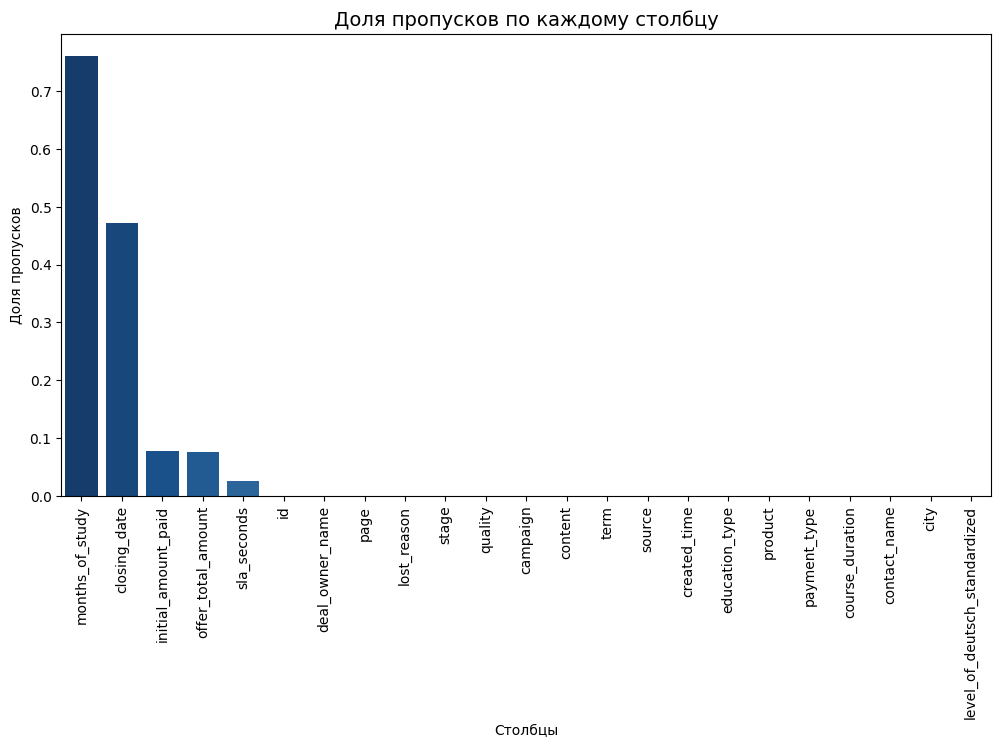

In [ ]:
missing_summary = deals.isnull().mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_summary.index, y=missing_summary.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Доля пропусков по каждому столбцу", fontsize=14)
plt.ylabel("Доля пропусков")
plt.xlabel("Столбцы")
plt.show()

GeoNastrojki

In [ ]:
import json
with open("city_data_google_en.json", "w") as json_file:
    json.dump(city_data, json_file, indent=4)
# try:
#     with open("city_data_google_en.json", "r") as file:
#         city_data = json.load(file)
#     print(city_data)
# except json.JSONDecodeError:
#     print("Ошибка: файл пустой или содержит невалидный JSON")
# except FileNotFoundError:
#     print("Ошибка: файл не найден")

In [ ]:
def get_city_info(city):
    info = city_data.get(city, {})
    return pd.Series({
        'longitude': info.get('longitude', None),
        'latitude': info.get('latitude', None),
        'country': info.get('country', None),
        'city': info.get('city', None),
        'federal_state': info.get('federal_state', None)
    })

deals['city'] = deals['city'].fillna('Unnamed')
deals[['longitude', 'latitude', 'country', 'city', 'federal_state']] = deals['city'].apply(get_city_info)

In [ ]:
deals.head()

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,content,term,...,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch_standardized,sla_seconds,longitude,latitude,country,federal_state
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,Unknown,Unknown,...,0.0,2000.0,5805028000056834471,None,Unknown,NaN,NaN,NaN,None,None
21,5805028000056859153,Ben Hall,NaT,B - Medium,Qualificated,Unknown,/at-eng,engwien_AT,b1-at,21_06_2024,...,NaN,NaN,5805028000056889019,None,Unknown,3745.0,NaN,NaN,None,None
56,5805028000056683030,Charlie Davis,NaT,C - Low,Waiting For Payment,Unknown,/eng/test,performancemax_eng_DE,_{region_name}_,Unknown,...,1000.0,9000.0,5805028000056690015,Crailsheim,Unknown,1239.0,10.063357,49.133735,Germany,Baden-Württemberg
60,5805028000056558351,Ulysses Adams,NaT,C - Low,Waiting For Payment,Unknown,/eng,Unknown,Unknown,Unknown,...,1000.0,9000.0,5805028000056578244,Dortmund,B1,589.0,7.465298,51.513587,Germany,North Rhine-Westphalia
63,5805028000056575242,Ben Hall,NaT,Unknown,Need a consultation,Unknown,/eng,02.07.23wide_DE,bloggersvideo23com,wide,...,NaN,NaN,5805028000008812393,None,Unknown,5450.0,NaN,NaN,None,None


In [ ]:
deals['city'] = deals['city'].fillna('Unknown')
deals['federal_state'] = deals['federal_state'].fillna('Unknown')
deals['country'] = deals['country'].fillna('Unknown')

deals.head()

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,content,term,...,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch_standardized,sla_seconds,longitude,latitude,country,federal_state
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,Unknown,Unknown,...,0.0,2000.0,5805028000056834471,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown
21,5805028000056859153,Ben Hall,NaT,B - Medium,Qualificated,Unknown,/at-eng,engwien_AT,b1-at,21_06_2024,...,NaN,NaN,5805028000056889019,Unknown,Unknown,3745.0,NaN,NaN,Unknown,Unknown
56,5805028000056683030,Charlie Davis,NaT,C - Low,Waiting For Payment,Unknown,/eng/test,performancemax_eng_DE,_{region_name}_,Unknown,...,1000.0,9000.0,5805028000056690015,Crailsheim,Unknown,1239.0,10.063357,49.133735,Germany,Baden-Württemberg
60,5805028000056558351,Ulysses Adams,NaT,C - Low,Waiting For Payment,Unknown,/eng,Unknown,Unknown,Unknown,...,1000.0,9000.0,5805028000056578244,Dortmund,B1,589.0,7.465298,51.513587,Germany,North Rhine-Westphalia
63,5805028000056575242,Ben Hall,NaT,Unknown,Need a consultation,Unknown,/eng,02.07.23wide_DE,bloggersvideo23com,wide,...,NaN,NaN,5805028000008812393,Unknown,Unknown,5450.0,NaN,NaN,Unknown,Unknown


# ***`Описательная статистика`***

# ***Calls***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

**Сводная статистика для числовых полей в calls:**

In [ ]:
calls_num_columns = calls.select_dtypes(include=np.number).columns.tolist()

print("Сводная статистика для числовых полей в calls:")
display(calls[calls_num_columns].describe().round(2))

print("\nМедиана, мода и размах для числовых полей в calls:")
for col in calls_num_columns:
    median = round(calls[col].median(), 2)
    mode = (
        round(calls[col].mode().iloc[0], 2)
        if not calls[col].mode().empty
        else np.nan
    )
    value_range = round(calls[col].max() - calls[col].min(), 2)

    print(
        f"{col}: Медиана - {median}, Мода - {mode}, "
        f"Размах - {value_range}"
    )

Сводная статистика для числовых полей в calls:


,id,call_duration_(in_seconds)
count,8.606500e+04,86065.00
mean,5.805028e+18,180.51
std,1.591541e+07,408.07
min,5.805028e+18,0.00
25%,5.805028e+18,4.00
50%,5.805028e+18,10.00
75%,5.805028e+18,131.00
max,5.805028e+18,3600.00



Медиана, мода и размах для числовых полей в calls:
id: Медиана - 5.80502800003207e+18, Мода - 5805028000000764027, Размах - 56148110
call_duration_(in_seconds): Медиана - 10.0, Мода - 0.0, Размах - 3600.0


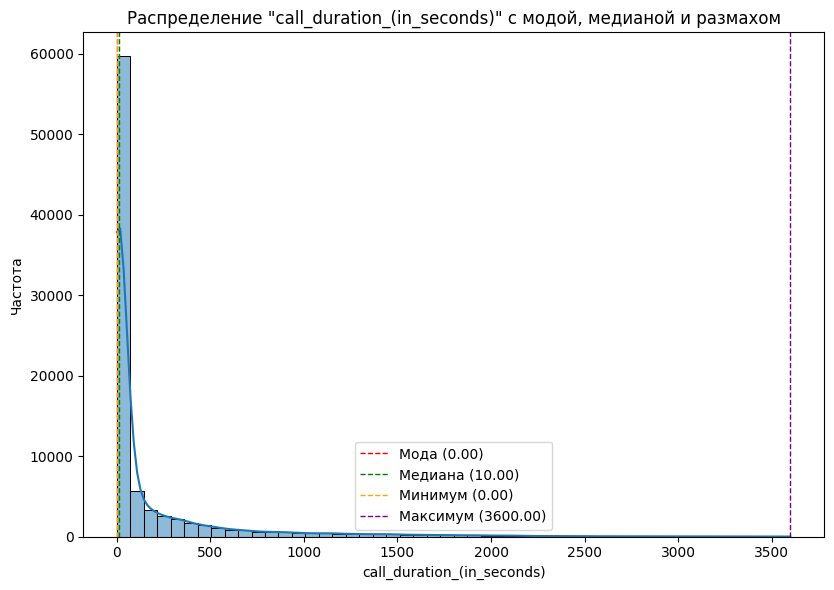

In [ ]:
numerical_cols_calls = calls.select_dtypes(include=np.number).columns.tolist()
numerical_cols_to_plot = [col for col in numerical_cols_calls if col != "id"]

n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(numerical_cols_to_plot) + n_cols - 1) // n_cols  # Number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
axes = axes.flatten()  # Flatten the 2D array of axes

for i, col in enumerate(numerical_cols_to_plot):
    sns.histplot(
        calls[col].dropna(),
        kde=True,
        bins=50,
        ax=axes[i]
    )
    axes[i].set_title(f'Распределение "{col}" с модой, медианой и размахом')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Частота")

    # Calculate and plot mode, median, and range
    median_val = calls[col].median()
    mode_val = calls[col].mode().iloc[0] if not calls[col].mode().empty else None
    min_val = calls[col].min()
    max_val = calls[col].max()

    if mode_val is not None:
        axes[i].axvline(
            mode_val,
            color="red",
            linestyle="dashed",
            linewidth=1,
            label=f"Мода ({mode_val:.2f})"
        )
    axes[i].axvline(
        median_val,
        color="green",
        linestyle="dashed",
        linewidth=1,
        label=f"Медиана ({median_val:.2f})"
    )
    axes[i].axvline(
        min_val,
        color="orange",
        linestyle="dashed",
        linewidth=1,
        label=f"Минимум ({min_val:.2f})"
    )
    axes[i].axvline(
        max_val,
        color="purple",
        linestyle="dashed",
        linewidth=1,
        label=f"Максимум ({max_val:.2f})"
    )

    axes[i].legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Анализ категориальных полей в calls:**

In [ ]:
calls_cat_columns = calls.select_dtypes(include=['object', 'category']).columns.tolist()
for c in calls_cat_columns:
    print("\n", c)
    print(calls[c].value_counts(normalize=True).head(10) * 100) #in %


 call_owner_name
call_owner_name
Yara Edwards     8.636496
Julia Nelson     7.837100
Ian Miller       7.607041
Charlie Davis    7.535003
Diana Evans      7.378144
Ulysses Adams    6.460234
Kevin Parker     6.066345
Victor Barnes    5.972230
Amy Green        5.928078
Nina Scott       5.865334
Name: proportion, dtype: float64

 contactid
contactid
5805028000003329100    0.112615
5805028000008246089    0.082342
5805028000007866898    0.081131
5805028000001880249    0.077499
5805028000002799040    0.067811
5805028000001404153    0.066600
5805028000022524164    0.064179
5805028000003597256    0.061757
5805028000008097198    0.061757
5805028000002917170    0.059335
Name: proportion, dtype: float64

 call_type
call_type
Outbound    90.363098
Missed       6.144193
Inbound      3.492709
Name: proportion, dtype: float64

 call_status
call_status
Attended Dialled              74.620345
Unattended Dialled            15.678847
Missed                         6.145355
Received                       

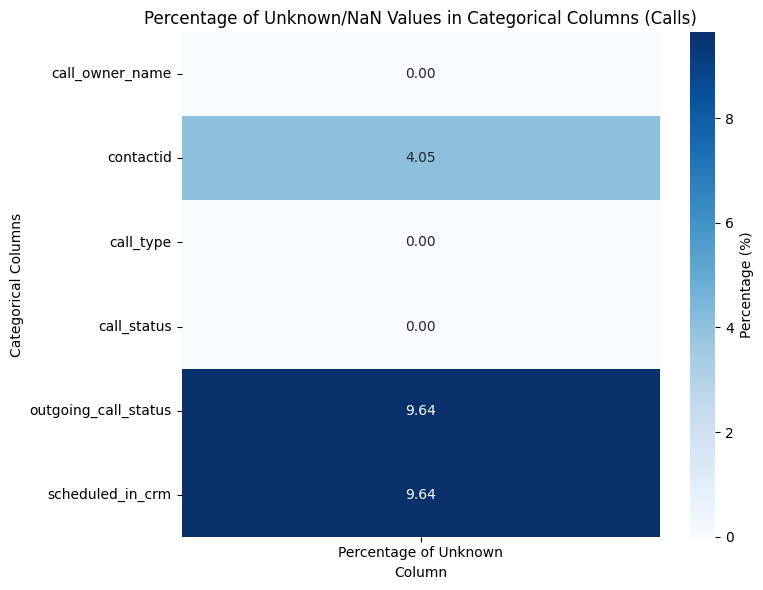

In [ ]:
categorical_cols_calls = calls.select_dtypes(include=["object", "category"]).columns

unknown_percentage_calls = (
    (calls[categorical_cols_calls] == "Unknown").sum()
    + calls[categorical_cols_calls].isnull().sum()
) / len(calls) * 100

heatmap_data_calls = pd.DataFrame(unknown_percentage_calls, columns=["Percentage of Unknown"])

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data_calls,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={"label": "Percentage (%)"}
)
plt.title("Percentage of Unknown/NaN Values in Categorical Columns (Calls)")
plt.xlabel("Column")
plt.ylabel("Categorical Columns")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

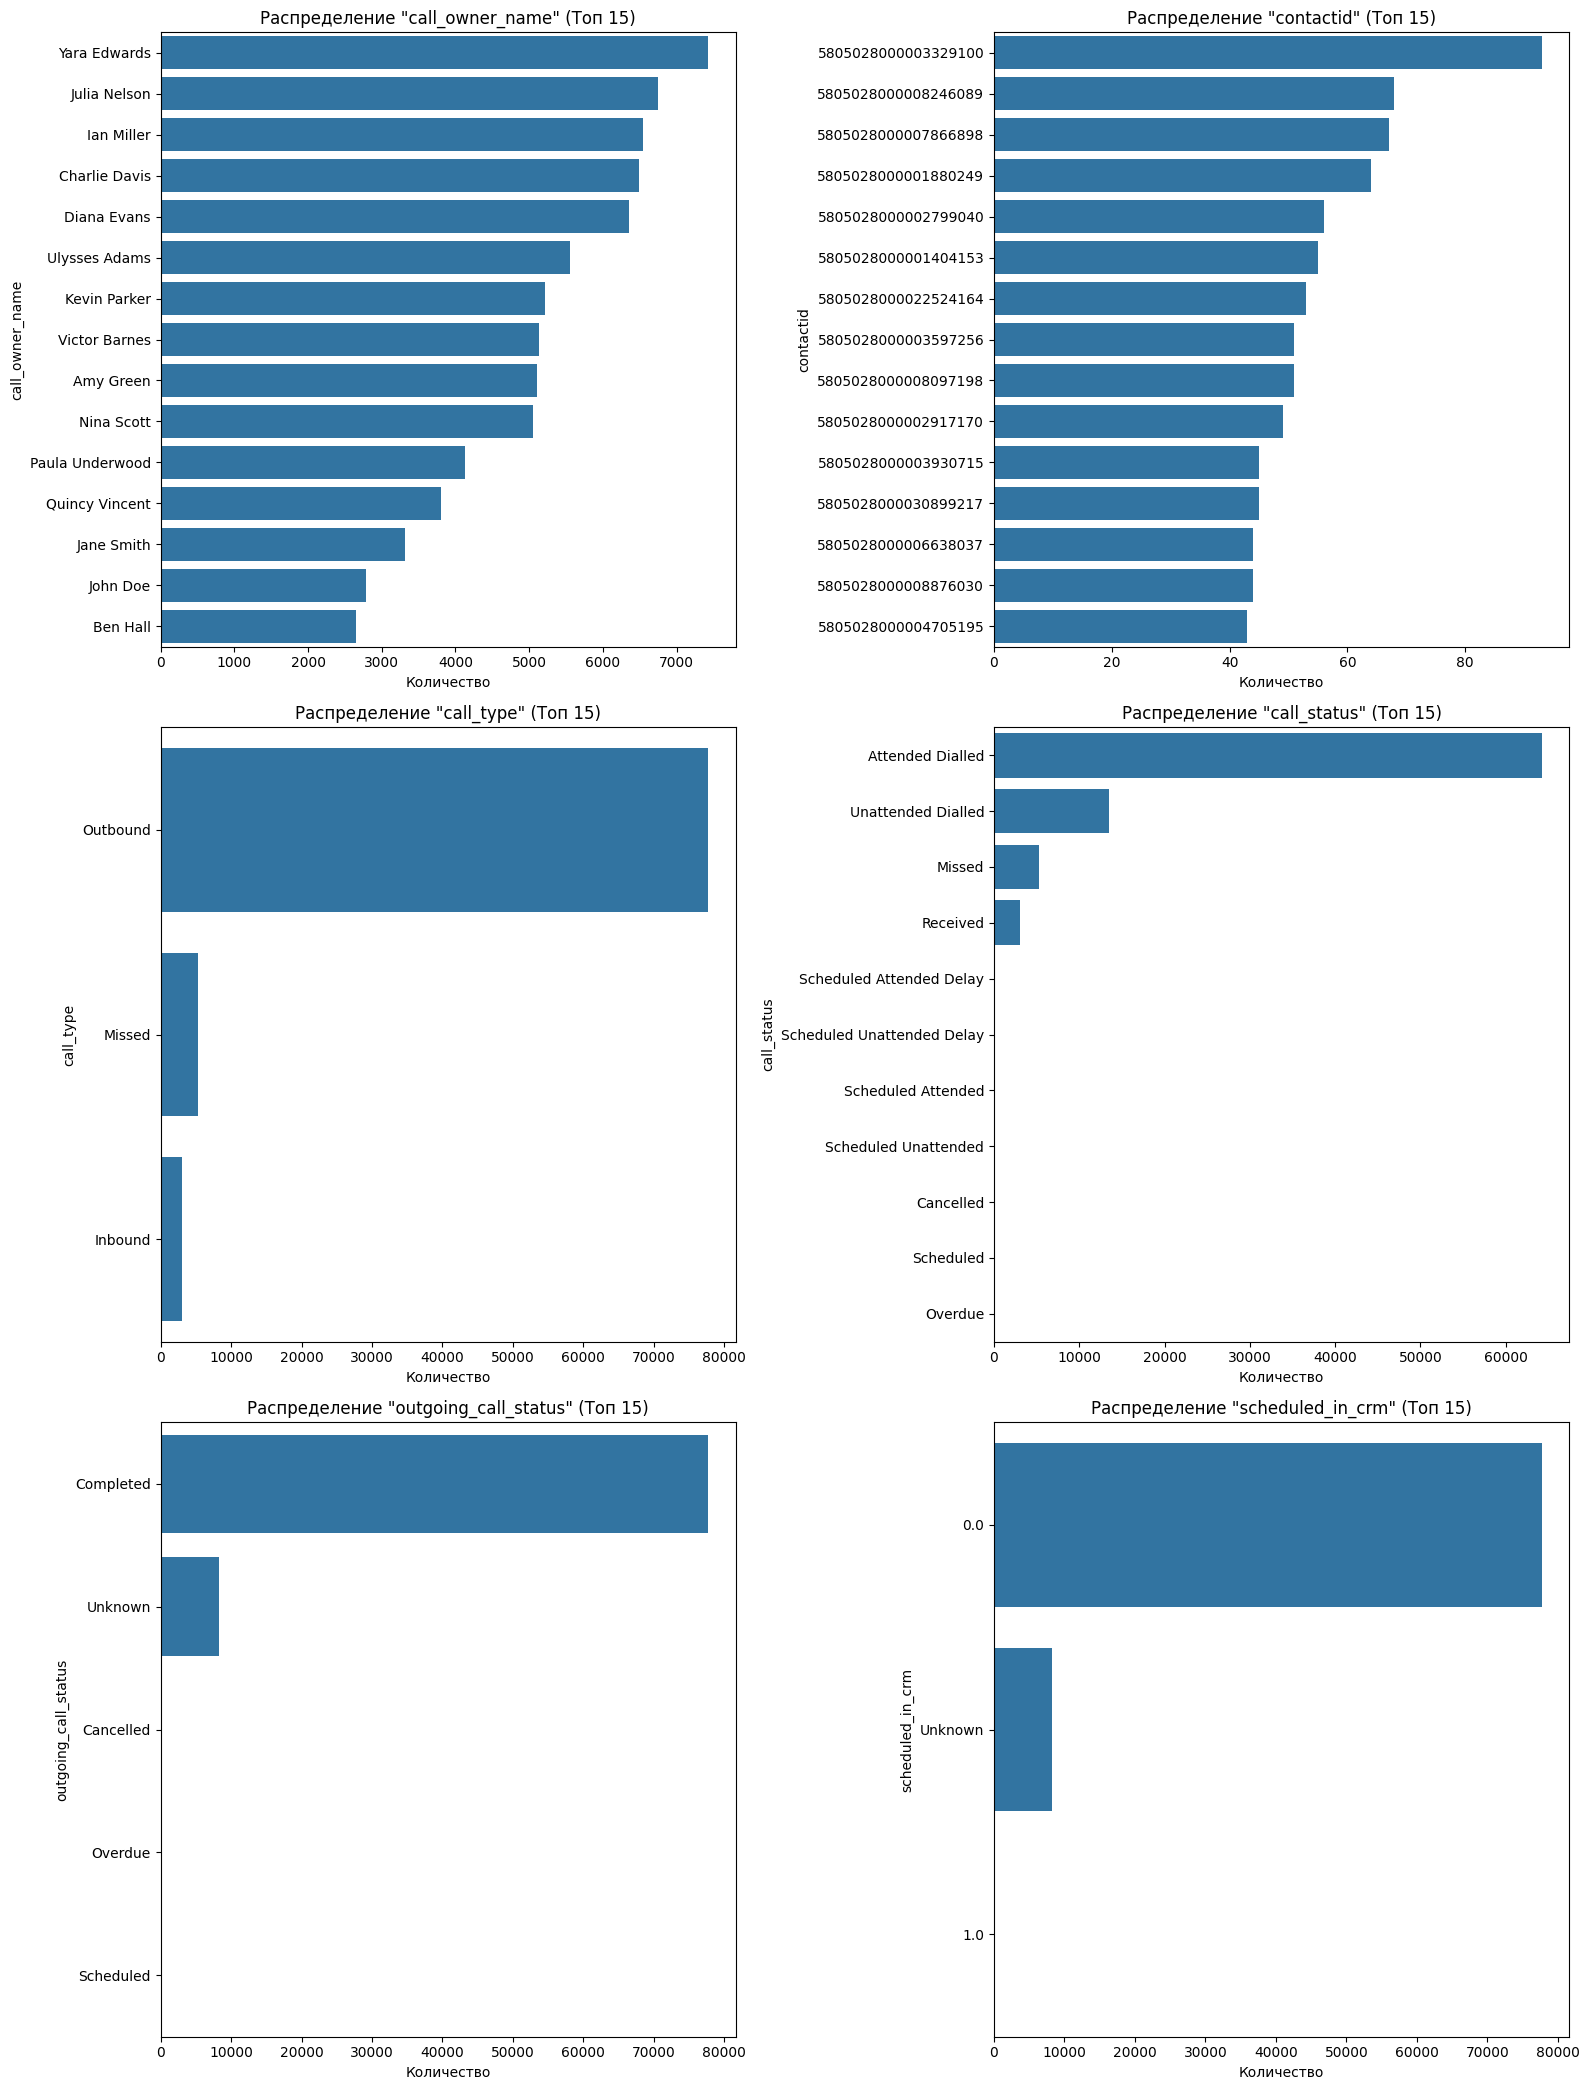

In [ ]:
calls_cat_columns = calls.select_dtypes(include=['object', 'category']).columns.tolist()

n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(calls_cat_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 7))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(calls_cat_columns):
    # Get the top 15 most frequent values
    top_15_values = calls[col].value_counts().head(15).index.tolist()
    filtered_calls = calls[calls[col].isin(top_15_values)]

    sns.countplot(y=col, data=filtered_calls, order=top_15_values, ax=axes[i])
    axes[i].set_title(f'Распределение "{col}" (Топ 15)')
    axes[i].set_xlabel('Количество')
    axes[i].set_ylabel(col)


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**1.Гистограмма продолжительности всех звонков:**:

Высокая концентрация коротких звонков: Большая часть звонков имеет очень короткую продолжительность, сосредоточенную около 0 секунд. Это видно по высокому столбику в начале гистограммы.

Правосторонняя асимметрия: Распределение сильно смещено вправо (имеет длинный "хвост" справа). Это означает, что есть небольшое количество звонков с очень большой продолжительностью, в то время как большинство звонков короткие.

Наличие выбросов: Длинный "хвост" также указывает на наличие выбросов - звонков с аномально большой продолжительностью, которые сильно отличаются от основной массы данных.

**2.Зависимость outgoing_call_status от call_owner_name:** Этот график показывает, как распределяются статусы исходящих звонков (Completed, Not Applicable, Overdue, Cancelled, Scheduled) между разными владельцами звонков. Мы видим, что большинство звонков имеют статус "Completed", и некоторые владельцы звонков имеют значительно больше звонков в целом, а также разное соотношение статусов по сравнению с другими. Например, у некоторых владельцев может быть больше "Not Applicable" звонков (возможно, входящие или пропущенные, которые не имеют статуса исходящего), в то время как у других почти все звонки "Completed".

**3.Распределение статусов всех звонков:** Этот график наглядно показывает общее соотношение различных статусов звонков (Attended Dialled, Unattended Dialled, Missed, Received и другие) во всем наборе данных calls. Наиболее частые статусы - Attended Dialled (успешные исходящие) и Unattended Dialled (неотвеченные исходящие), что согласуется с тем, что большинство звонков в данных являются исходящими.

***Общий вывод по этим графикам:***

Графики подтверждают, что основная активность в данных calls связана с исходящими звонками. Существует значительное количество очень коротких звонков и пропущенных/неотвеченных. Распределение звонков и их статусов сильно варьируется между разными владельцами звонков, что может говорить о разной нагрузке, специализации или эффективности работы сотрудников.

In [ ]:
long_calls = calls[calls["call_duration_(in_seconds)"] > 250]

print("Звонки с продолжительностью более 250 секунд:")
display(long_calls.head(10))

print(
    f"\nОбщее количество звонков с продолжительностью более 250 секунд: "
    f"{len(long_calls)}"
)

Звонки с продолжительностью более 250 секунд:


,id,call_start_time,call_owner_name,contactid,call_type,call_duration_(in_seconds),call_status,outgoing_call_status,scheduled_in_crm
90918,5805028000054112961,2024-06-09 17:29:00,Quincy Vincent,5805028000053276436,Outbound,3600.0,Attended Dialled,Completed,0.0
9396,5805028000008574051,2023-09-22 11:29:00,Ian Miller,5805028000008461130,Outbound,3600.0,Attended Dialled,Completed,0.0
29543,5805028000021701757,2023-12-17 17:18:00,Sam Young,5805028000021670451,Outbound,3596.0,Attended Dialled,Completed,0.0
79253,5805028000049575436,2024-05-12 18:13:00,Julia Nelson,5805028000049566256,Outbound,3593.0,Attended Dialled,Completed,0.0
80188,5805028000050550346,2024-05-14 16:18:00,Quincy Vincent,5805028000042682317,Outbound,3591.0,Attended Dialled,Completed,0.0
62969,5805028000041217464,2024-04-02 17:02:00,Ulysses Adams,5805028000041190112,Outbound,3581.0,Attended Dialled,Completed,0.0
40591,5805028000028537978,2024-01-27 14:46:00,Charlie Davis,5805028000028427969,Outbound,3571.0,Attended Dialled,Completed,0.0
95184,5805028000056704138,2024-06-20 12:24:00,Eva Kent,5805028000050559164,Outbound,3551.0,Attended Dialled,Completed,0.0
61942,5805028000040650028,2024-03-30 12:46:00,Ben Hall,5805028000040539489,Outbound,3538.0,Attended Dialled,Completed,0.0
70958,5805028000045243512,2024-04-20 17:24:00,Ben Hall,5805028000045238109,Outbound,3495.0,Attended Dialled,Completed,0.0



Общее количество звонков с продолжительностью более 250 секунд: 16160


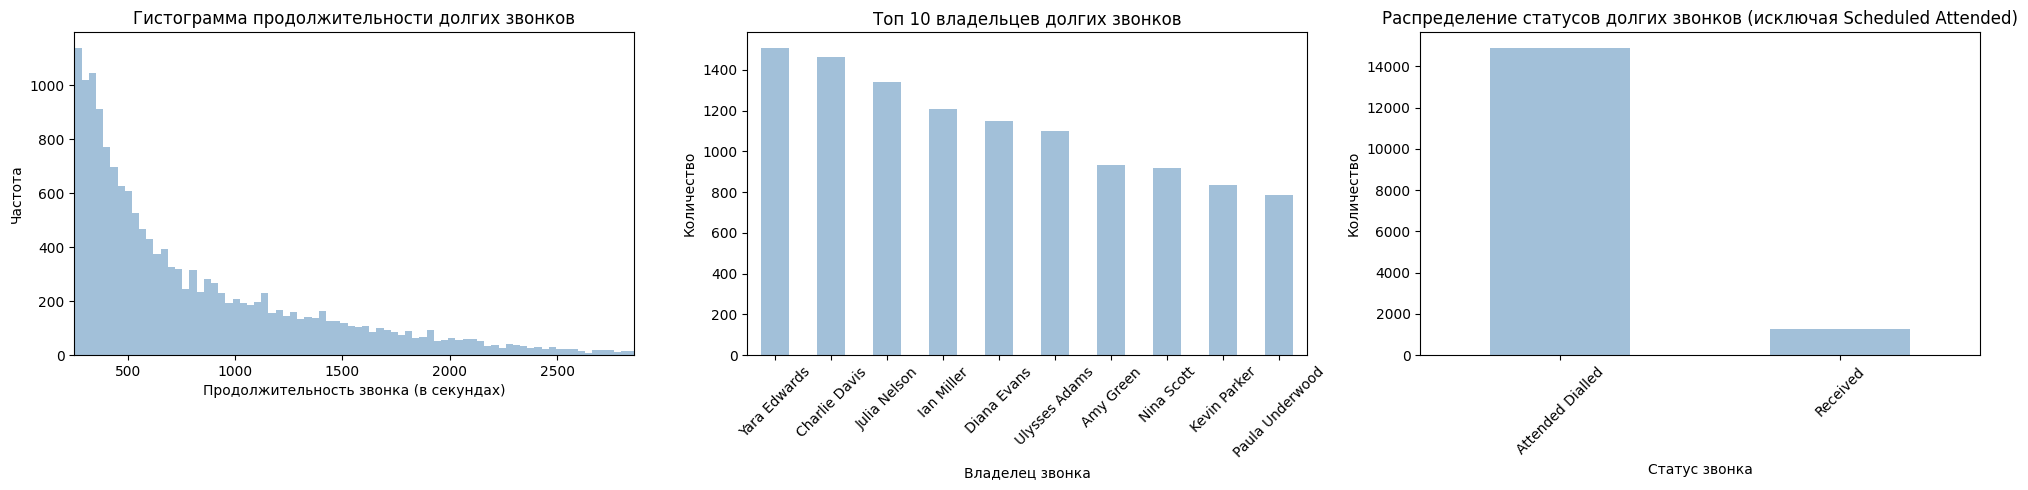

In [ ]:
long_calls = calls[calls["call_duration_(in_seconds)"] > 250].copy()

categorical_cols_to_analyze = ["call_type", "call_owner_name", "call_status"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

ax1.hist(
    long_calls["call_duration_(in_seconds)"].dropna(),
    bins=100,
    color="steelblue",
    alpha=0.5,
)
ax1.set_title("Гистограмма продолжительности долгих звонков")
ax1.set_xlabel("Продолжительность звонка (в секундах)")
ax1.set_ylabel("Частота")
ax1.set_xlim(
    long_calls["call_duration_(in_seconds)"].min(),
    long_calls["call_duration_(in_seconds)"].quantile(0.99),
)  # Limit x-axis to 99th percentile

long_calls["call_owner_name"].value_counts().head(10).plot(
    kind="bar", ax=ax2, color="steelblue", alpha=0.5
)
ax2.set_title("Топ 10 владельцев долгих звонков")
ax2.set_xlabel("Владелец звонка")
ax2.set_ylabel("Количество")
ax2.tick_params(axis="x", rotation=45)

status_counts = long_calls[long_calls["call_status"] != "Scheduled Attended"][
    "call_status"
].value_counts()
status_counts[status_counts > 0].plot(kind="bar", ax=ax3, color="steelblue", alpha=0.5)
ax3.set_title("Распределение статусов долгих звонков (исключая Scheduled Attended)")
ax3.set_xlabel("Статус звонка")
ax3.set_ylabel("Количество")
ax3.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
scheduled_attended_long_calls = long_calls[long_calls["call_status"] == "Scheduled Attended"]

display(scheduled_attended_long_calls)

,id,call_start_time,call_owner_name,contactid,call_type,call_duration_(in_seconds),call_status,outgoing_call_status,scheduled_in_crm
79790,5805028000047119187,2024-05-13 20:31:00,Victor Barnes,NaN,Outbound,2411.0,Scheduled Attended,Completed,1.0


Исходя из графиков распределения категориальных полей для звонков продолжительностью более 250 секунд, можно сделать следующие выводы:

**Call Type:** Подавляющее большинство долгих звонков являются исходящими (Outbound). Это может говорить о том, что долгие звонки чаще всего инициируются сотрудниками компании, возможно, в рамках сложных продаж или консультаций.

**Call Owner Name:** График показывает распределение долгих звонков по владельцам. Некоторые владельцы звонков имеют значительно больше долгих звонков по сравнению с другими. Это может указывать на то, что эти сотрудники занимаются более сложными или длительными взаимодействиями с клиентами, или же у них есть особенности в работе, приводящие к увеличению продолжительности звонков.

**Call Status:** Наиболее частый статус для долгих звонков - Attended Dialled. Это подтверждает, что эти долгие исходящие звонки были успешными (на них ответили). Также присутствует статус Received, что указывает на наличие долгих входящих звонков, хотя их доля меньше.

В целом, эти графики показывают, что долгие звонки в основном являются исходящими, совершаются определенными владельцами звонков и имеют статус "Attended Dialled".

**Выводы по данным из DataFrame calls:**

**Числовые поля (id, contactid, call_duration_(in_seconds)):**

*   **id** и **contactid**: Эти поля являются числовыми идентификаторами. id уникален для каждого звонка, а `contactid` связывает звонки с контактами (хотя есть пропущенные значения). Сводная статистика показывает их распределение, но для анализа они используются в основном для идентификации и связывания данных.
*   **call_duration_(in_seconds)**:
    *   **Среднее и медиана**: Средняя продолжительность звонка составляет около 180.62 секунд, а медиана - всего 10.0 секунд. Это указывает на сильную правостороннюю асимметрию: большинство звонков очень короткие, но есть значительное количество долгих звонков, которые "тянут" среднее значение вверх.
    *   **Мода**: Наиболее частая продолжительность звонка - 0 секунд. Это могут быть пропущенные звонки или звонки, которые не состоялись по какой-то причине.
    *   **Размах**: Размах составляет 3600 секунд, что подтверждает наличие звонков с максимальной продолжительностью до 3600 секунд (1 час), хотя таких звонков очень мало (0.04% от общего числа).
    *   **Выбросы**: Присутствуют звонки с аномально большой продолжительностью, которые были идентифицированы как выбросы (например, звонки > 3600 секунд, которые были удалены).

**Категориальные поля (call_owner_name, call_type, call_status, outgoing_call_status, scheduled_in_crm):**

*   **call_owner_name**: Распределение звонков по владельцам контактов неравномерное. Некоторые владельцы имеют значительно больше звонков, чем другие. Это может быть важным для анализа нагрузки на сотрудников или их эффективности.
*   **call_type**: Подавляющее большинство звонков являются исходящими (Outbound - 90.36%). Входящие (Inbound) и пропущенные (Missed) звонки составляют меньшую долю.
*   **call_status**: Наиболее распространенные статусы - Attended Dialled (74.63%) и Unattended Dialled (15.66%). Это соответствует преобладанию исходящих звонков. Присутствуют также Received (3.49%) и Missed (6.14%). Статусы, связанные с планированием (`Scheduled`), составляют очень малую долю.
*   **outgoing_call_status**: Для исходящих звонков основной статус - Completed (90.36%). Значительная часть имеет статус Unknown (9.64%), что, вероятно, связано с входящими или пропущенными звонками, для которых этот статус не применим.
*   **scheduled_in_crm**: Поле показывает, был ли звонок запланирован в CRM. Большинство звонков (90.30%) не были запланированы (значение 0.0). Небольшая доля (0.06%) была запланирована (значение 1.0), и есть пропущенные значения (9.64%), которые, как было показано на тепловой карте, совпадают с пропущенными значениями в outgoing_call_status.

**Общие выводы по DataFrame calls:**

Данные в calls в основном отражают исходящую активность. Присутствует значительное количество очень коротких и пропущенных звонков. Распределение звонков и их характеристик (продолжительность, статус) варьируется между владельцами звонков. Были обнаружены и обработаны дубликаты и выбросы (очень долгие звонки и одновременные звонки одному контакту). Пропущенные значения в outgoing_call_status и scheduled_in_crm в основном совпадают, что указывает на их взаимосвязь или специфику регистрации для определенных типов звонков.

# ***Contacts***

**Сводная статистика для числовых полей в Contacts:**

После очистки и преобразования типов данных в DataFrame contacts не осталось числовых столбцов для расчета сводной статистики. Столбцы 'created_time' и 'modified_time' теперь имеют тип datetime.

**Анализ категориальных полей в contacts:**

In [ ]:
contacts_cat_columns = contacts.select_dtypes(include=['object', 'category']).columns.tolist()
for c in contacts_cat_columns:
    print("\n", c)
    print(contacts[c].value_counts(normalize=True).head(10) * 100) #in %


 id
id
5805028000056907001    0.005391
5805028000000645014    0.005391
5805028000000872003    0.005391
5805028000000889001    0.005391
5805028000056834001    0.005391
5805028000056833279    0.005391
5805028000056833242    0.005391
5805028000056833185    0.005391
5805028000056832215    0.005391
5805028000056828292    0.005391
Name: proportion, dtype: float64

 contact_owner_name
contact_owner_name
Charlie Davis      10.879879
Ulysses Adams       9.790813
Julia Nelson        9.537416
Paula Underwood     8.017037
Quincy Vincent      7.634246
Nina Scott          6.200129
Ben Hall            5.596291
Victor Barnes       5.213500
Cara Iverson        4.744447
Rachel White        4.216088
Name: proportion, dtype: float64


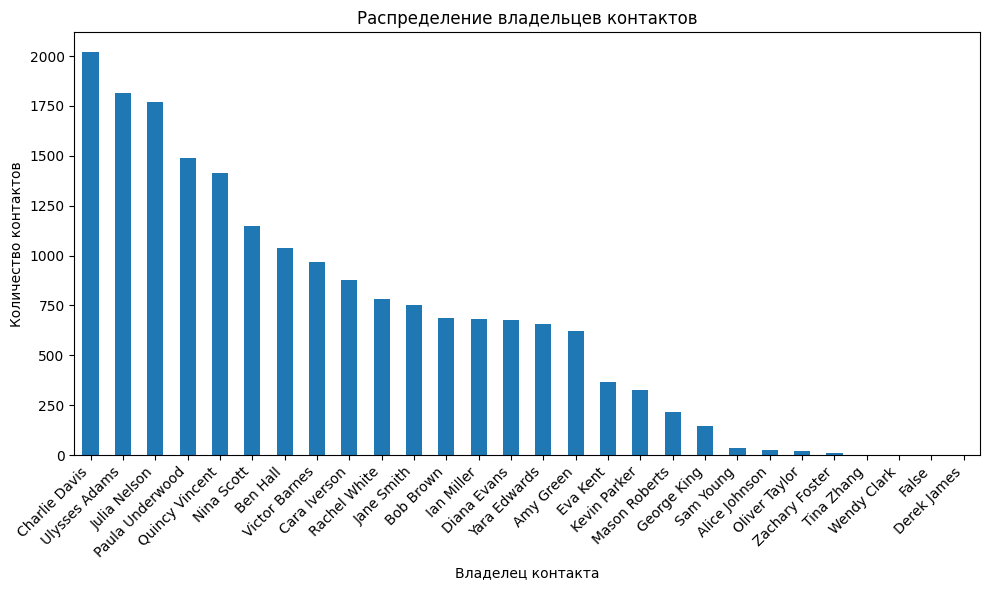

In [ ]:
plt.figure(figsize=(10, 6))
contacts['contact_owner_name'].value_counts().plot(kind='bar')
plt.title('Распределение владельцев контактов')
plt.xlabel('Владелец контакта')
plt.ylabel('Количество контактов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Выводы по данным из DataFrame contacts:**

*   **contact_owner_name**: График наглядно показывает распределение контактов по их владельцам. Видно, что количество контактов значительно варьируется между разными владельцами. У "Zachary Foster" самое большое количество контактов, в то время как у "Wendy Clark", "Tina Zhang" и значения "False" (которое, возможно, является ошибкой или неназначенными контактами) количество контактов значительно меньше. Это может указывать на неравномерное распределение рабочей нагрузки или особенности в назначении контактов.
*   **created_time и modified_time**: Эти столбцы были преобразованы в формат datetime, что позволяет проводить временной анализ, например, отслеживать динамику создания и изменения контактов.

# ***Spend***

**Сводная статистика для числовых полей в Spend:**

In [ ]:
spend_num_columns = spend.select_dtypes(include=np.number).columns.tolist()

print("Сводная статистика для числовых полей в spend:")
display(spend[spend_num_columns].describe().round(2))

print("\nМедиана, мода и размах для числовых полей в spend:")
for col in spend_num_columns:
    median = round(spend[col].median(), 2)
    mode = round(spend[col].mode().iloc[0], 2) if not spend[col].mode().empty else np.nan
    value_range = round(spend[col].max() - spend[col].min(), 2)

    print(f"{col}: Медиана - {median}, Мода - {mode}, Размах - {value_range}")

Сводная статистика для числовых полей в spend:


,impressions,spend,clicks
count,16787.00,16787.00,16787.00
mean,2940.68,8.01,28.74
std,11651.17,20.48,88.34
min,0.00,0.00,0.00
25%,10.00,0.07,0.00
50%,178.00,1.53,4.00
75%,919.00,7.72,16.00
max,169699.00,300.00,1254.00



Медиана, мода и размах для числовых полей в spend:
impressions: Медиана - 178.0, Мода - 0, Размах - 169699
spend: Медиана - 1.53, Мода - 0.0, Размах - 300.0
clicks: Медиана - 4.0, Мода - 0, Размах - 1254


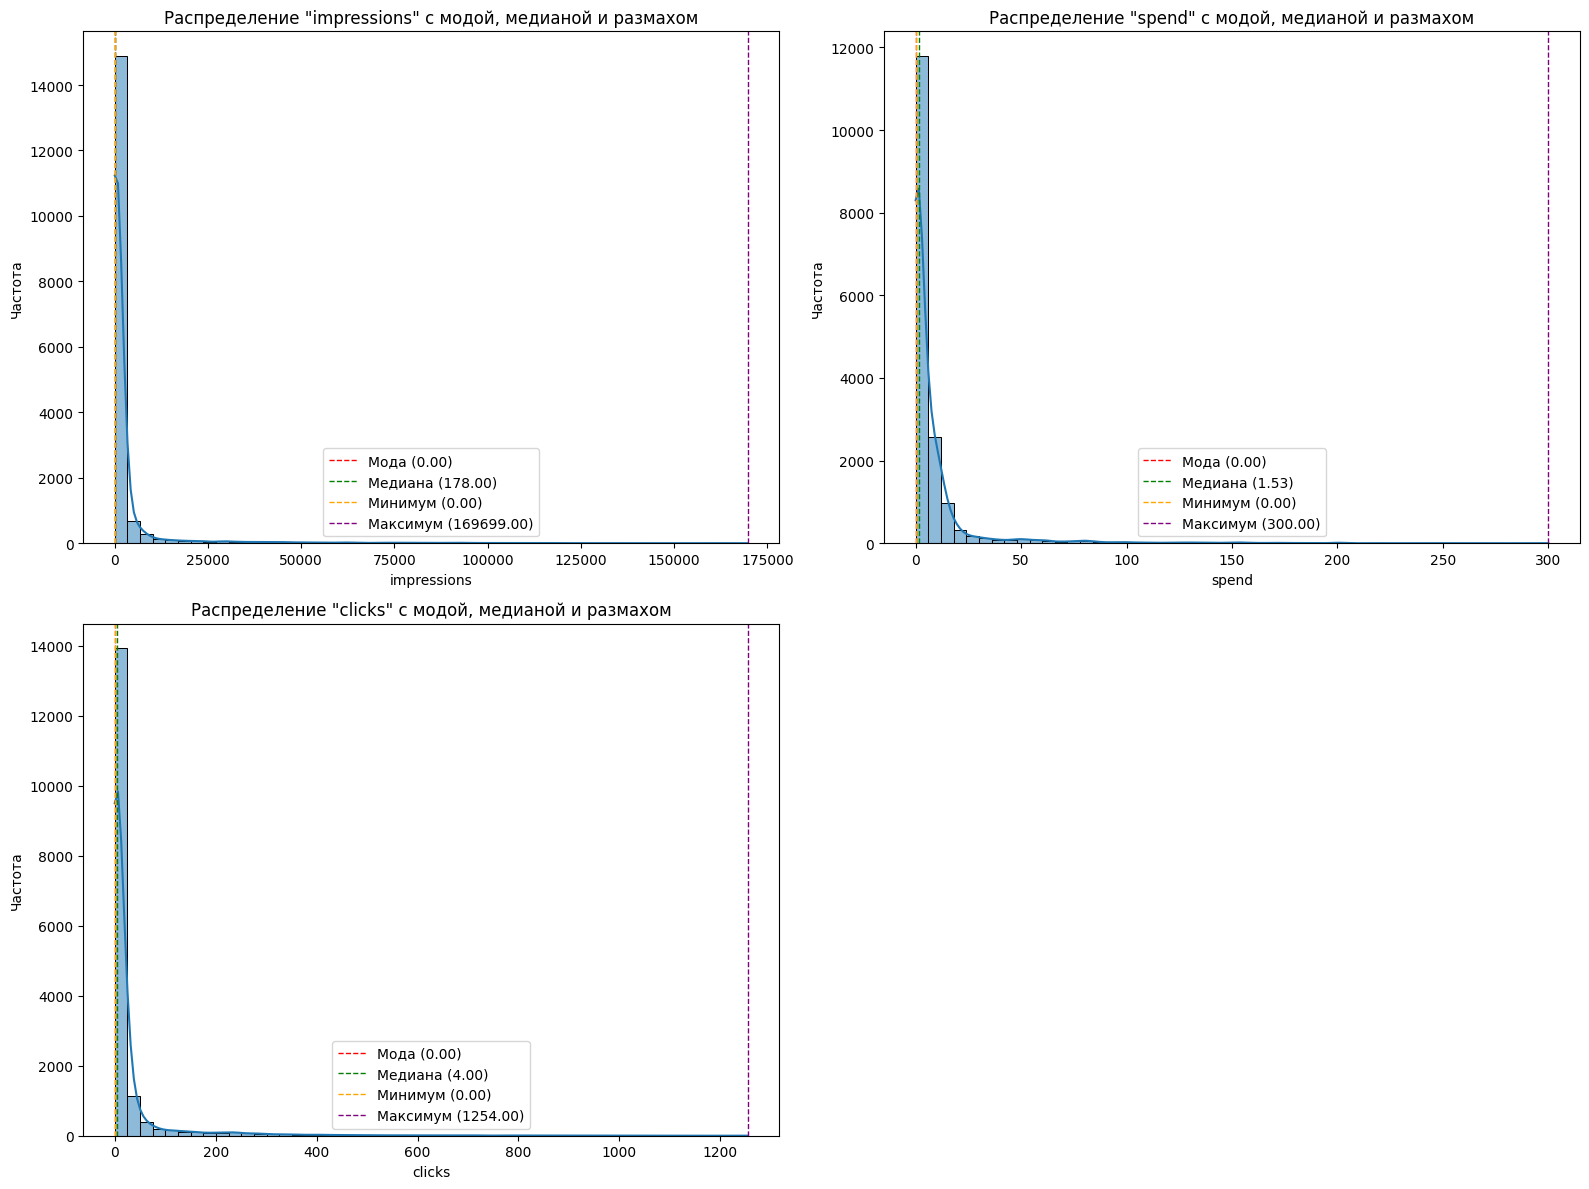

In [ ]:
numerical_cols_spend = spend.select_dtypes(include=np.number).columns.tolist()
numerical_cols_to_plot = [col for col in numerical_cols_spend if col != "id"]

n_cols = 2
n_rows = (len(numerical_cols_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(numerical_cols_to_plot):
    sns.histplot(
        spend[col].dropna(),
        kde=True,
        bins=50,
        ax=axes[i]
    )
    axes[i].set_title(f'Распределение "{col}" с модой, медианой и размахом')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Частота")

    median_val = spend[col].median()
    mode_val = spend[col].mode().iloc[0] if not spend[col].mode().empty else None
    min_val = spend[col].min()
    max_val = spend[col].max()

    if mode_val is not None:
        axes[i].axvline(
            mode_val,
            color="red",
            linestyle="dashed",
            linewidth=1,
            label=f"Мода ({mode_val:.2f})"
        )
    axes[i].axvline(
        median_val,
        color="green",
        linestyle="dashed",
        linewidth=1,
        label=f"Медиана ({median_val:.2f})"
    )
    axes[i].axvline(
        min_val,
        color="orange",
        linestyle="dashed",
        linewidth=1,
        label=f"Минимум ({min_val:.2f})"
    )
    axes[i].axvline(
        max_val,
        color="purple",
        linestyle="dashed",
        linewidth=1,
        label=f"Максимум ({max_val:.2f})"
    )

    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Анализ категориальных полей в Spend**

In [ ]:
spend_cat_columns = spend.select_dtypes(include=['object', 'category']).columns.tolist()
for c in spend_cat_columns:
    print("\n", c)
    print(spend[c].value_counts(normalize=True).head(10) * 100) #in %


 source
source
Facebook Ads      54.887711
Tiktok Ads        15.666885
Youtube Ads        8.512539
Google Ads         5.391076
Organic            3.026151
Telegram posts     2.859355
SMM                2.847441
Webinar            2.615119
CRM                1.876452
Bloggers           1.560732
Name: proportion, dtype: float64

 campaign
campaign
Unknown                      12.974325
12.07.2023wide_DE            12.348841
02.07.23wide_DE              10.037529
04.07.23recentlymoved_DE      8.327873
youtube_shorts_DE             7.285399
07.07.23LAL_DE                7.035206
03.07.23women                 6.975636
12.09.23interests_Uxui_DE     6.808840
15.07.23b_DE                  3.151248
24.09.23retargeting_DE        3.002323
Name: proportion, dtype: float64

 adgroup
adgroup
wide                           32.471555
Unknown                        17.900757
recentlymoved                   8.589980
women                           7.589206
LAL1                            7.267528
Com_a

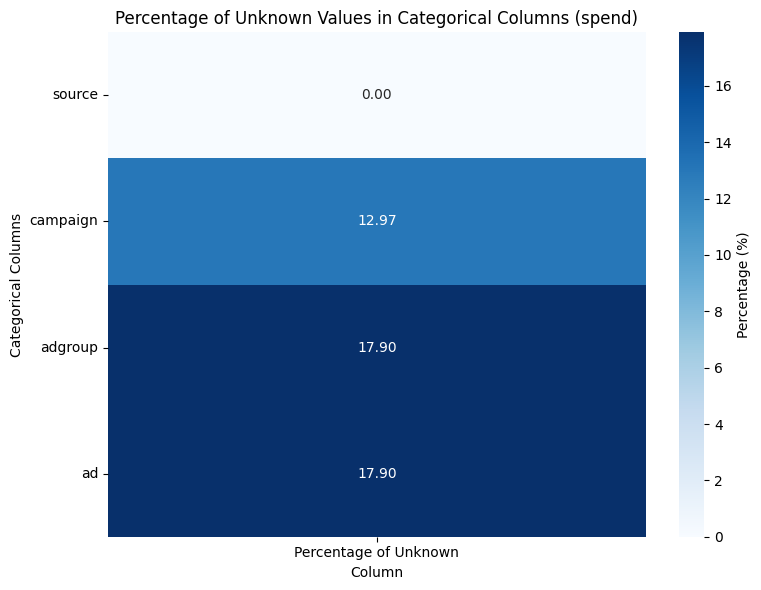

In [ ]:
categorical_cols_spend = spend.select_dtypes(include=["object", "category"]).columns

unknown_percentage_spend = (
    (spend[categorical_cols_spend] == "Unknown").sum()
    + spend[categorical_cols_spend].isnull().sum()
) / len(spend) * 100

heatmap_data_spend = pd.DataFrame(unknown_percentage_spend, columns=["Percentage of Unknown"])

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data_spend,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={"label": "Percentage (%)"},
)
plt.title("Percentage of Unknown Values in Categorical Columns (spend)")
plt.xlabel("Column")
plt.ylabel("Categorical Columns")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

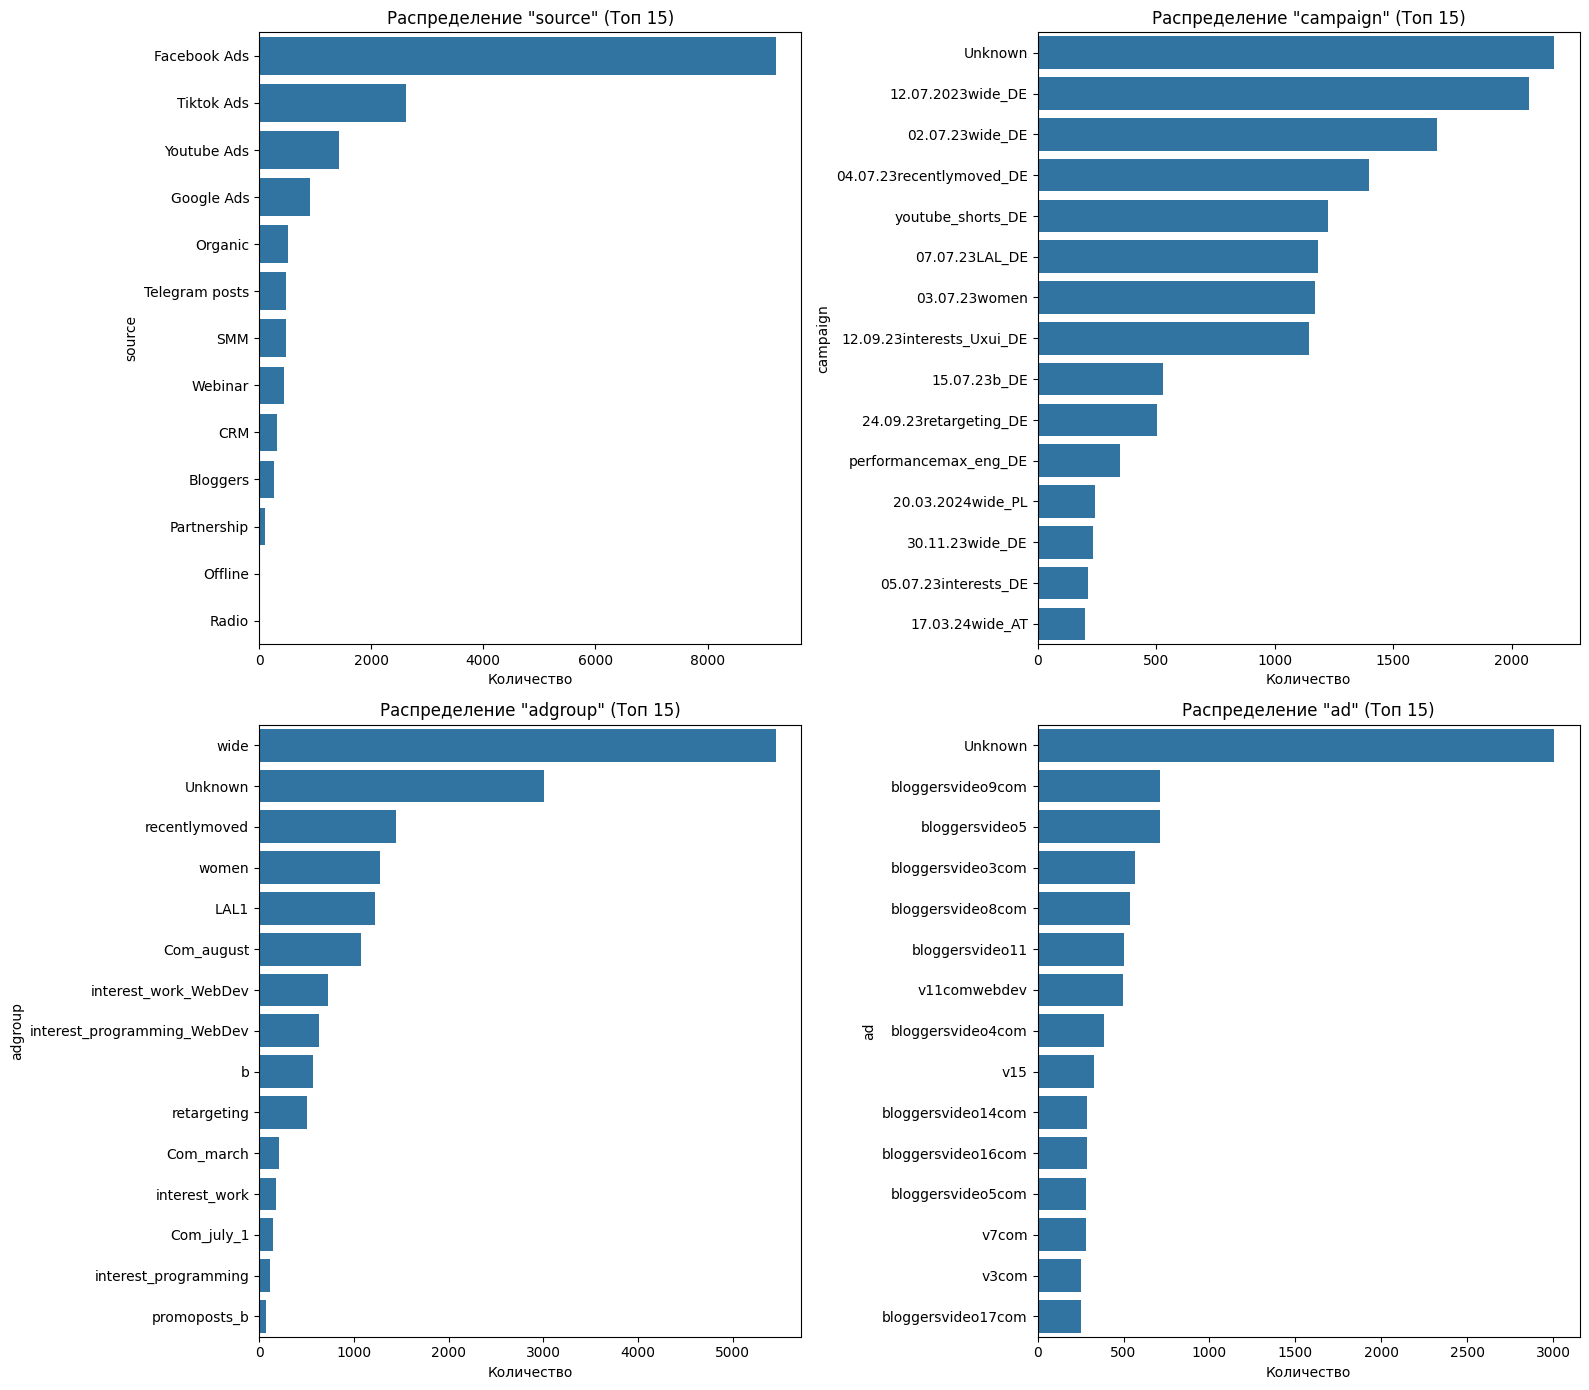

In [ ]:
spend_cat_columns = spend.select_dtypes(include=['object', 'category']).columns.tolist()

n_cols = 2
n_rows = (len(spend_cat_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 7))
axes = axes.flatten()

for i, col in enumerate(spend_cat_columns):

    top_15_values = spend[col].value_counts().head(15).index.tolist()
    filtered_spend = spend[spend[col].isin(top_15_values)]

    sns.countplot(y=col, data=filtered_spend, order=top_15_values, ax=axes[i])
    axes[i].set_title(f'Распределение "{col}" (Топ 15)')
    axes[i].set_xlabel('Количество')
    axes[i].set_ylabel(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Выводы по данным из DataFrame spend:**

**Числовые поля (impressions, spend, clicks):**

*   **Распределение**: Все числовые поля (impressions, spend, clicks) имеют сильно выраженное правостороннее распределение. Большинство значений сосредоточены около нуля, с длинным "хвостом" вправо, указывающим на наличие выбросов или очень больших значений.
*   **Сводная статистика**: Средние значения значительно выше медиан (например, среднее impressions ~2940 против медианы 178), что подтверждает асимметрию и влияние больших значений. Мода для всех трех столбцов равна 0, что указывает на большое количество строк с нулевыми показателями (которые, возможно, были отфильтрованы или представляют неактивные кампании/объявления).
*   **Выбросы**: Анализ выбросов с использованием IQR показал, что значительный процент строк имеет значения выше верхней границы (особенно в impressions - 14.11%), что еще раз подчеркивает наличие аномально высоких показателей. Были идентифицированы и удалены явные выбросы с очень высокими значениями в этих столбцах.

**Категориальные поля (date, source, campaign, adgroup, ad):**

*   **date**: Столбец был преобразован в формат datetime, что позволяет проводить временной анализ расходов и эффективности.
*   **source**: Наиболее частые источники расходов - Facebook Ads, Tiktok Ads и Youtube Ads. Присутствует небольшая доля органического трафика (Organic) и других источников. Источник 'Test' был удален.
*   **campaign, adgroup, ad**: Эти столбцы содержат информацию о конкретных рекламных кампаниях, группах объявлений и объявлениях. Присутствует значительный процент пропущенных значений или значений 'Unknown', особенно в adgroup и ad (~17.9%), а также в campaign (~12.97%). Это может затруднить детальный анализ эффективности на уровне отдельных кампаний или объявлений без дальнейшей обработки или понимания причин отсутствия данных.
*   **Пропущенные/Unknown значения**: Тепловая карта наглядно показала процент пропущенных/Unknown значений в категориальных столбцах. Наибольший процент неопределенных данных наблюдается в adgroup и ad, что следует учитывать при анализе.

**Общие выводы по DataFrame spend:**

Данные по расходам имеют выраженную асимметрию в числовых показателях (impressions, spend, clicks) с большим количеством нулевых или очень низких значений и небольшим количеством очень высоких значений. Расходы распределены между несколькими основными источниками. Присутствует значительное количество неопределенных данных в столбцах, описывающих кампании, группы объявлений и объявления, что является важным моментом для учета при проведении анализа эффективности рекламы. Были проведены шаги по очистке данных, включая удаление строк с нулевыми показателями и выбросов.

# ***Deals***

**Сводная статистика для числовых полей в Deals:**

In [ ]:
deals_num_columns = deals.select_dtypes(include=np.number).columns.tolist()

print("Сводная статистика для числовых полей в deals:")
display(deals[deals_num_columns].describe().round(2))

print("\nМедиана, мода и размах для числовых полей в deals:")
for col in deals_num_columns:
    median = round(deals[col].median(), 2)
    mode = round(deals[col].mode().iloc[0], 2) if not deals[col].mode().empty else np.nan
    value_range = round(deals[col].max() - deals[col].min(), 2)

    print(f"{col}: Медиана - {median}, Мода - {mode}, Размах - {value_range}")

Сводная статистика для числовых полей в deals:


,course_duration,months_of_study,initial_amount_paid,offer_total_amount,sla_seconds,longitude,latitude
count,3505.00,835.00,3237.00,3239.0,3419.00,2094.00,2094.00
mean,10.20,5.45,1141.92,8978.7,111233.46,10.46,50.62
std,1.84,2.92,1380.34,3250.4,796800.18,8.10,2.44
min,6.00,0.00,0.00,0.0,0.00,-118.25,7.88
25%,11.00,3.00,1000.00,5000.0,62.00,8.21,49.23
50%,11.00,5.00,1000.00,11000.0,6048.00,9.79,50.94
75%,11.00,8.00,1000.00,11000.0,46537.00,11.97,52.18
max,11.00,11.00,11000.00,11500.0,26908464.00,103.09,59.93



Медиана, мода и размах для числовых полей в deals:
course_duration: Медиана - 11.0, Мода - 11.0, Размах - 5.0
months_of_study: Медиана - 5.0, Мода - 6.0, Размах - 11.0
initial_amount_paid: Медиана - 1000.0, Мода - 1000.0, Размах - 11000.0
offer_total_amount: Медиана - 11000.0, Мода - 11000.0, Размах - 11500.0
sla_seconds: Медиана - 6048.0, Мода - 0.0, Размах - 26908464.0
longitude: Медиана - 9.79, Мода - 13.4, Размах - 221.34
latitude: Медиана - 50.94, Мода - 52.52, Размах - 52.05


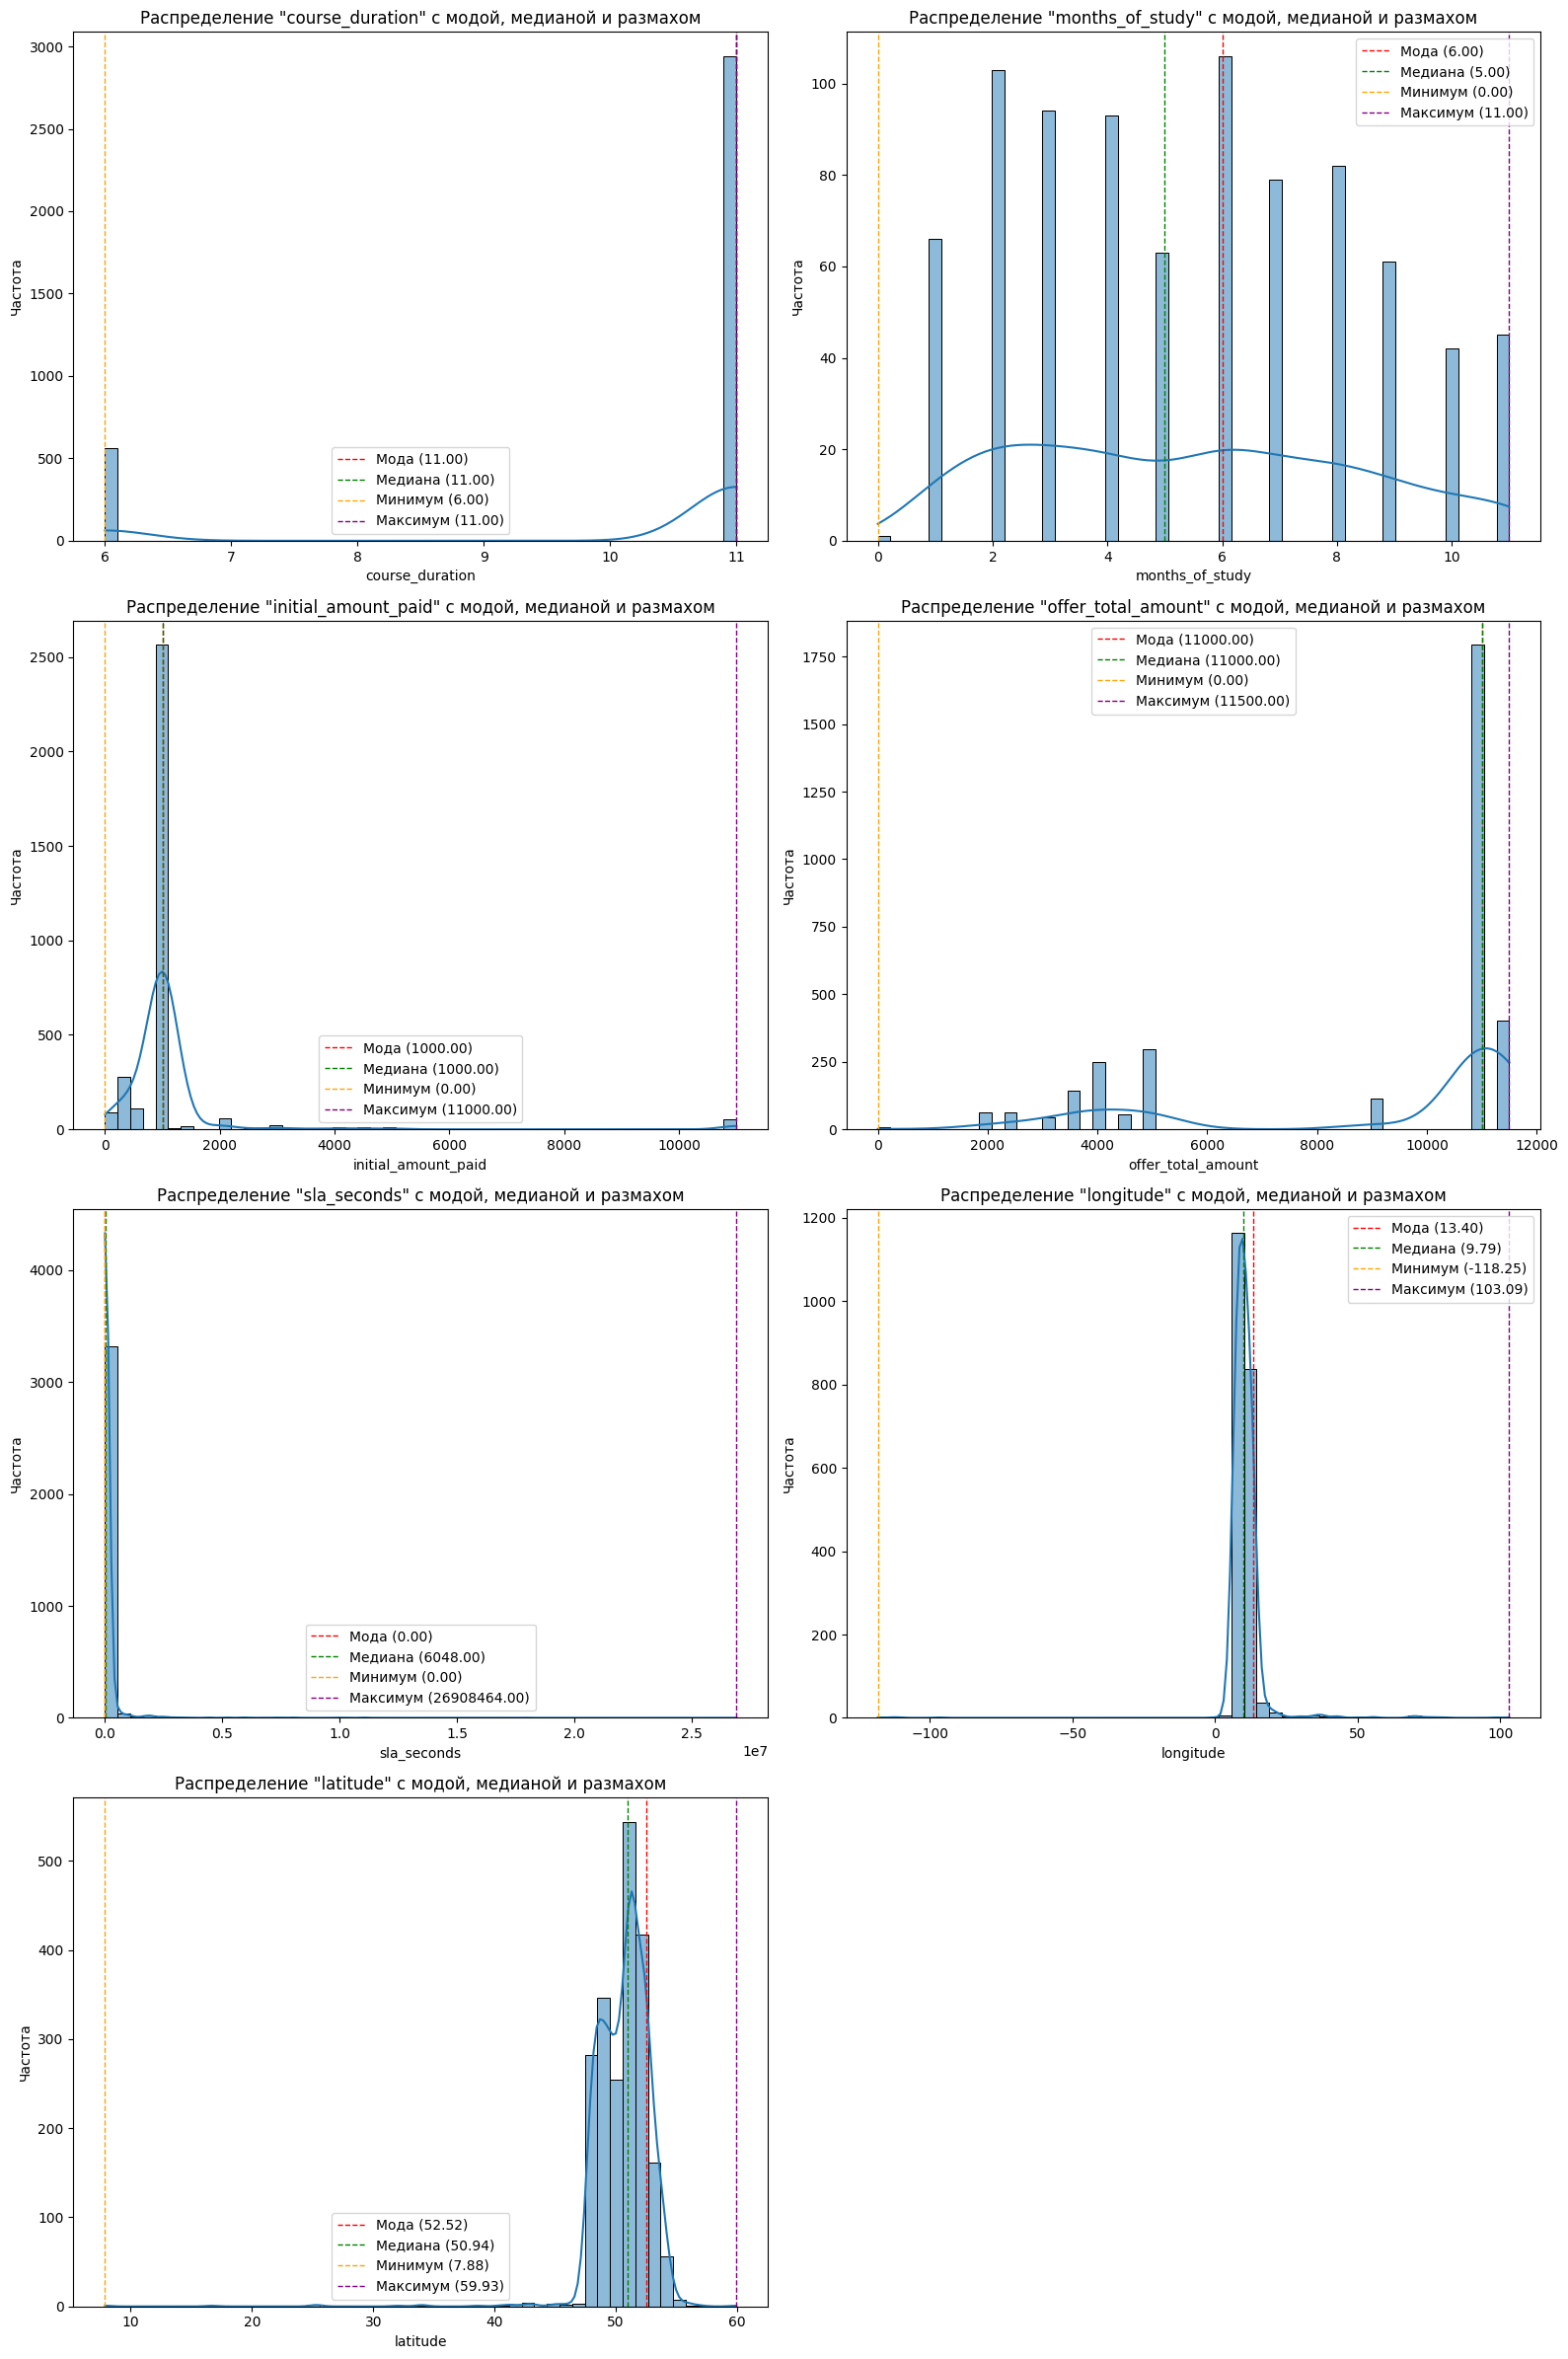

In [ ]:
numerical_cols_deals = deals.select_dtypes(include=np.number).columns.tolist()
numerical_cols_to_plot = [col for col in numerical_cols_deals if col != "id"]

n_cols = 2
n_rows = (len(numerical_cols_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 6))
axes = axes.flatten()
for i, col in enumerate(numerical_cols_to_plot):
    sns.histplot(
        deals[col].dropna(),
        kde=True,
        bins=50,
        ax=axes[i]
    )
    axes[i].set_title(f'Распределение "{col}" с модой, медианой и размахом')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Частота")

    median_val = deals[col].median()
    mode_val = deals[col].mode().iloc[0] if not deals[col].mode().empty else None
    min_val = deals[col].min()
    max_val = deals[col].max()

    if mode_val is not None:
        axes[i].axvline(
            mode_val,
            color="red",
            linestyle="dashed",
            linewidth=1,
            label=f"Мода ({mode_val:.2f})"
        )
    axes[i].axvline(
        median_val,
        color="green",
        linestyle="dashed",
        linewidth=1,
        label=f"Медиана ({median_val:.2f})"
    )
    axes[i].axvline(
        min_val,
        color="orange",
        linestyle="dashed",
        linewidth=1,
        label=f"Минимум ({min_val:.2f})"
    )
    axes[i].axvline(
        max_val,
        color="purple",
        linestyle="dashed",
        linewidth=1,
        label=f"Максимум ({max_val:.2f})"
    )

    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Анализ категориальных полей в Deals**

In [ ]:
deals_cat_columns = deals.select_dtypes(include=['object', 'category']).columns.tolist()
for c in deals_cat_columns:
    print("\n", c)
    print(deals[c].value_counts(normalize=True).head(10) * 100) #in %


 id
id
5805028000000947046    0.028531
5805028000001471037    0.028531
5805028000001517025    0.028531
5805028000001495090    0.028531
5805028000001508114    0.028531
5805028000001568001    0.028531
5805028000001695062    0.028531
5805028000001790025    0.028531
5805028000001812001    0.028531
5805028000001792145    0.028531
Name: proportion, dtype: float64

 deal_owner_name
deal_owner_name
Ulysses Adams      17.375178
Charlie Davis      12.582026
Julia Nelson       11.041369
Paula Underwood     9.614836
Ben Hall            8.815977
Quincy Vincent      7.503566
Victor Barnes       7.303852
Nina Scott          6.105563
Oliver Taylor       4.308131
Jane Smith          4.079886
Name: proportion, dtype: float64

 quality
quality
C - Low              43.623395
B - Medium           30.584879
D - Non Target       14.864479
A - High              9.728959
E - Non Qualified     1.055635
Unknown               0.142653
Name: proportion, dtype: float64

 stage
stage
Lost                         55

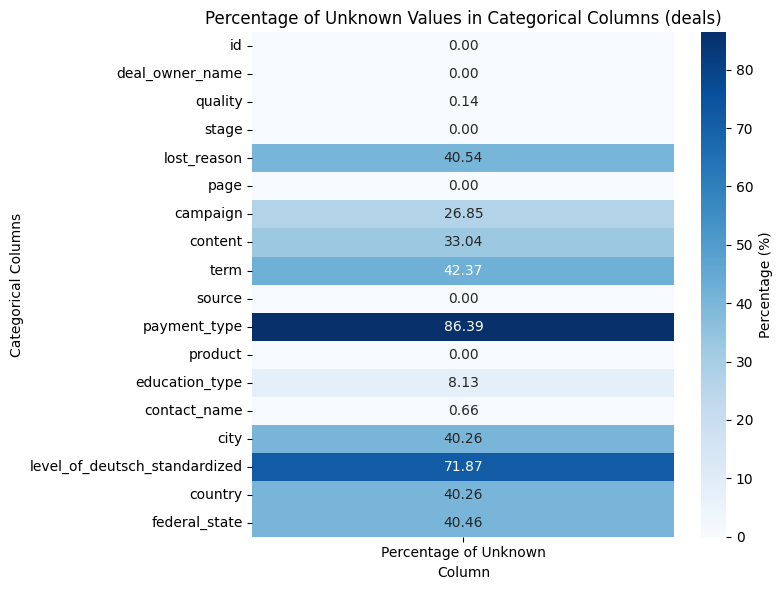

In [ ]:
categorical_cols_deals = deals.select_dtypes(include=["object", "category"]).columns

unknown_percentage_deals = (
    (deals[categorical_cols_deals] == "Unknown").sum()
    + deals[categorical_cols_deals].isnull().sum()
) / len(deals) * 100

heatmap_data_deals = pd.DataFrame(unknown_percentage_deals, columns=["Percentage of Unknown"])

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data_deals,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={"label": "Percentage (%)"},
)
plt.title("Percentage of Unknown Values in Categorical Columns (deals)")
plt.xlabel("Column")
plt.ylabel("Categorical Columns")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1565693141.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-1565693141.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-1565693141.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-1565693141.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-1565693141.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-1565693141.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

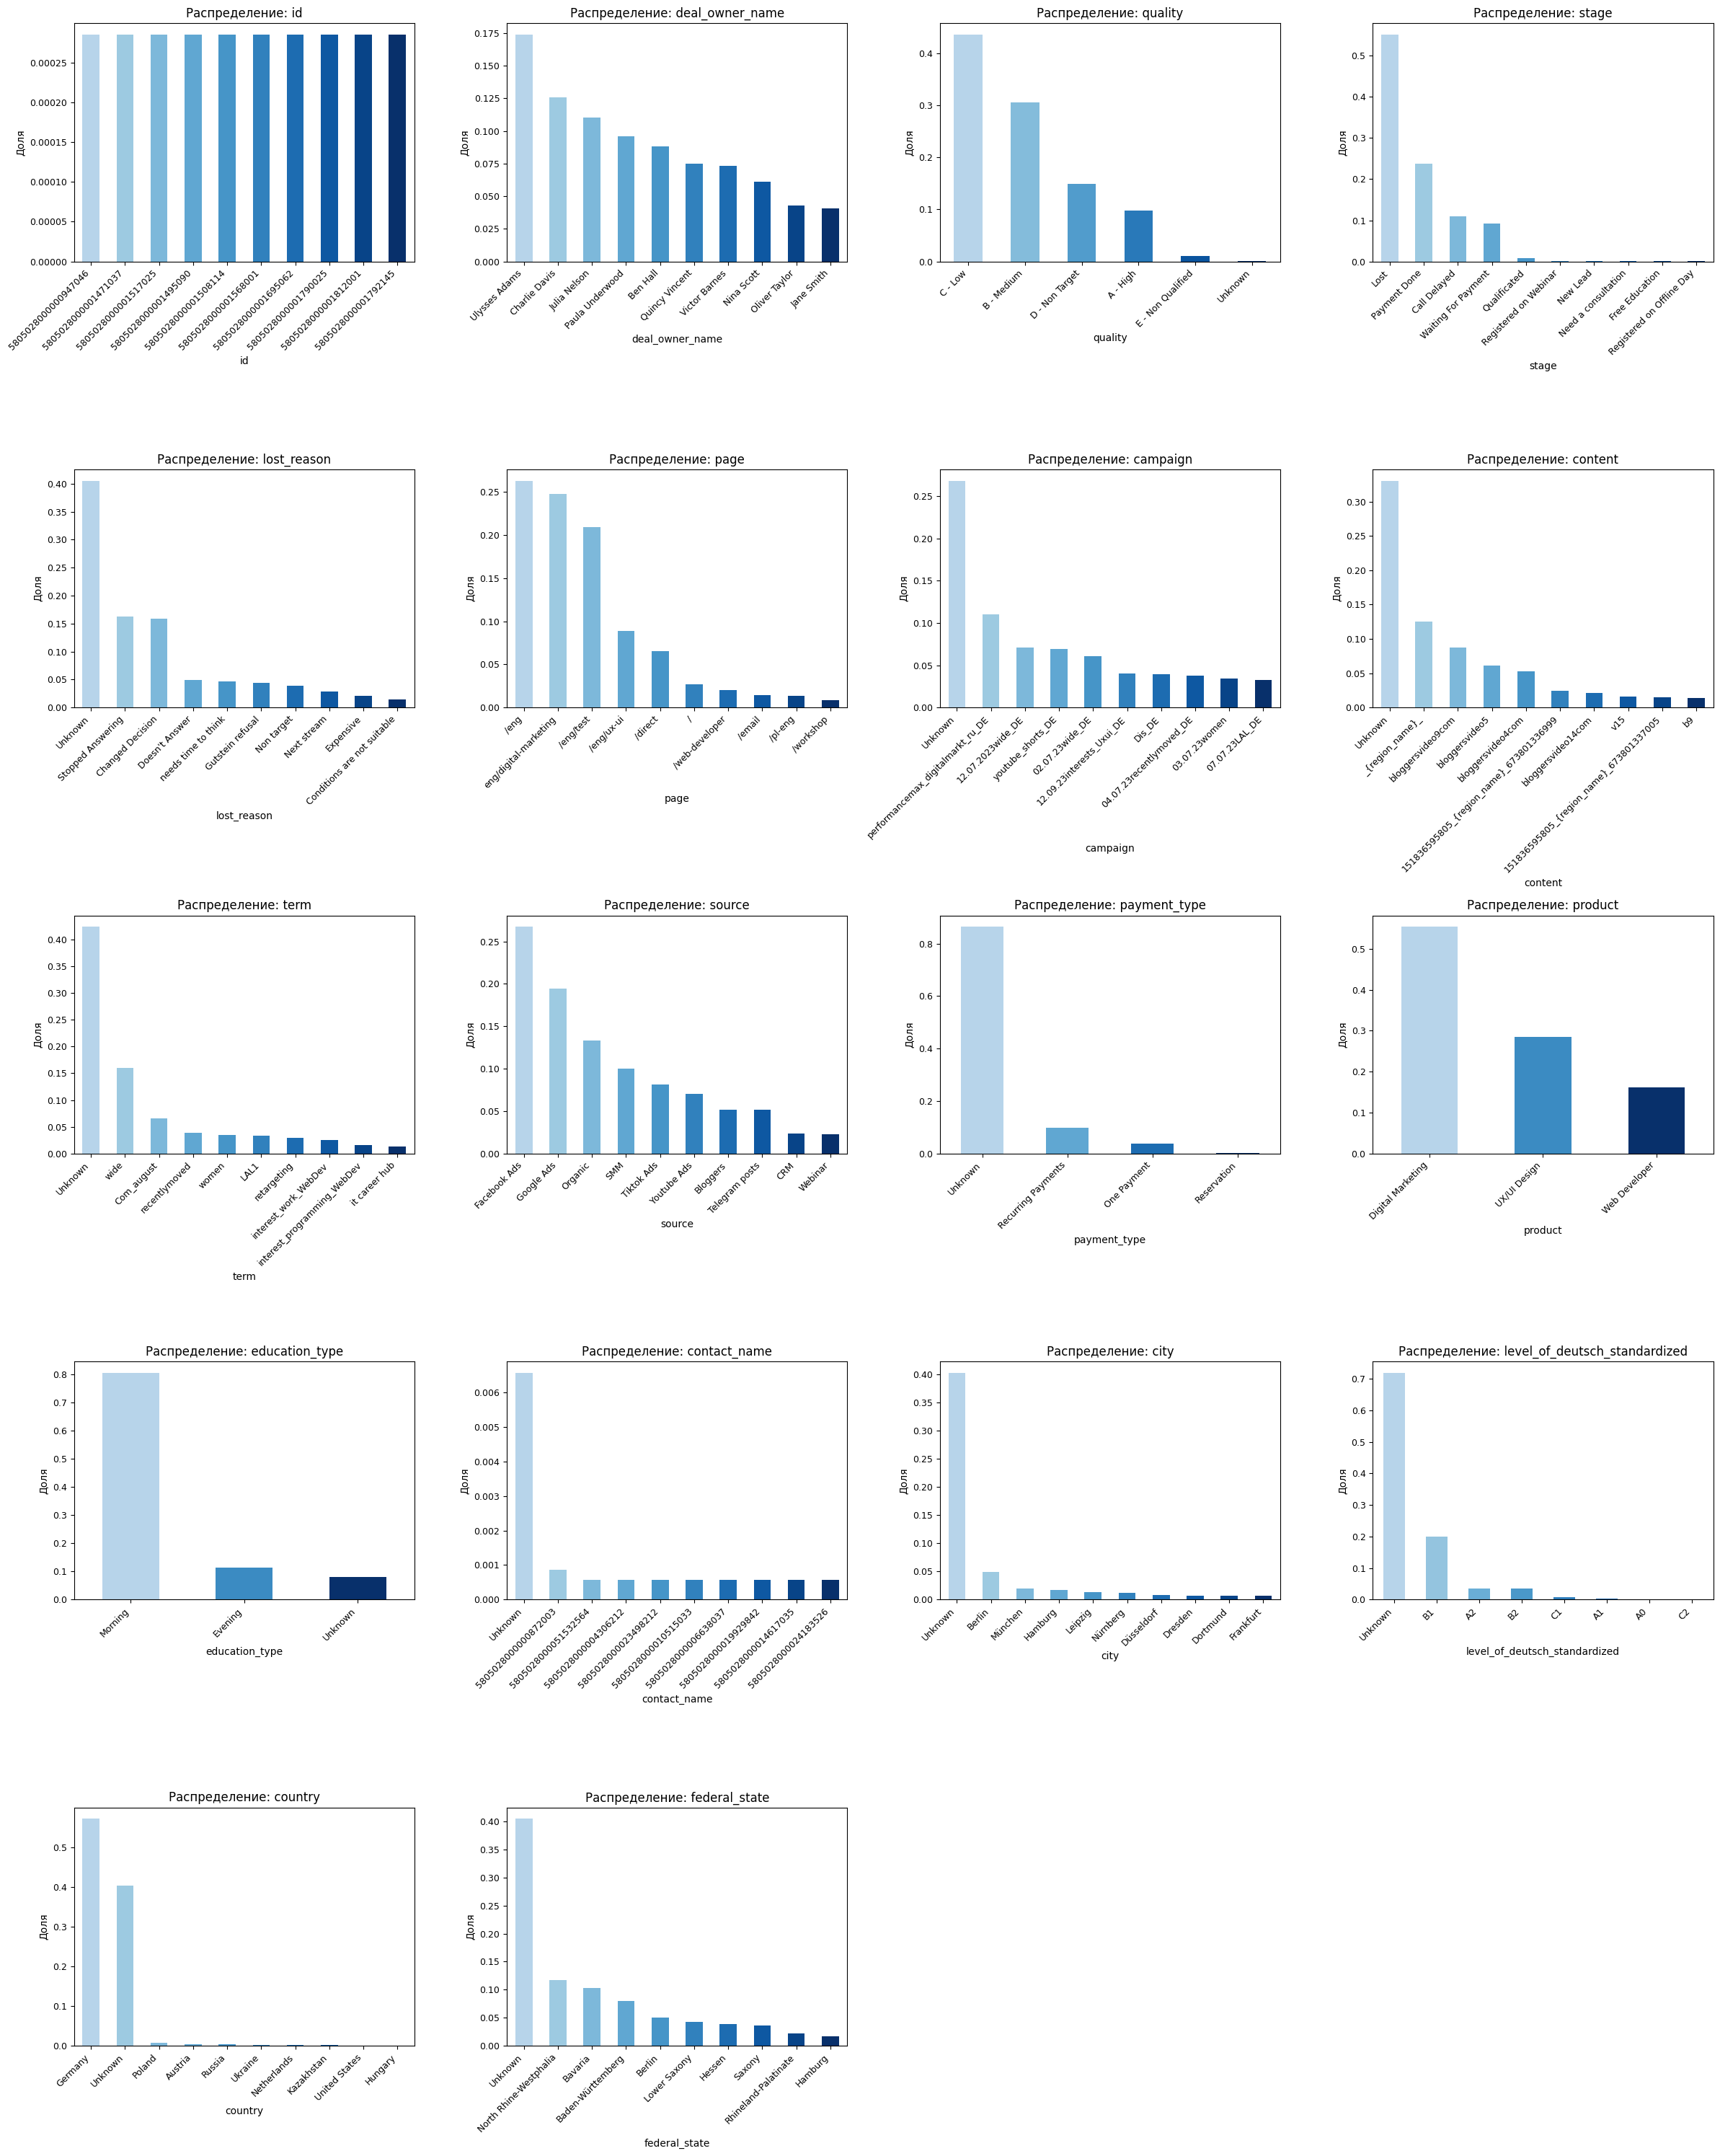

In [ ]:
deals_cat_columns = deals.select_dtypes(include=["object", "category"]).columns.tolist()

n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(deals_cat_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, n_rows * 6))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Define a blue colormap
cmap = plt.get_cmap("Blues")

for i, col in enumerate(deals_cat_columns):
    if i < len(axes):
        top_10_values = deals[col].value_counts(normalize=True).head(10)
        colors = cmap(np.linspace(0.3, 1, len(top_10_values)))
        top_10_values.plot(kind="bar", ax=axes[i], color=colors)
        axes[i].set_title(f"Распределение: {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Доля")
        axes[i].set_xticklabels(
            axes[i].get_xticklabels(), rotation=45, ha="right", fontsize=9
        )
        axes[i].set_yticklabels(axes[i].get_yticklabels(), fontsize=9)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Выводы по данным из DataFrame Deals:**

**Числовые поля (course_duration, months_of_study, initial_amount_paid, offer_total_amount, sla_seconds):**

* **course_duration и months_of_study**: Эти поля имеют ограниченный набор уникальных значений, особенно course_duration с модой и медианой в 11.0. Это может указывать на стандартизированную продолжительность курсов. Есть пропущенные значения, которые могут быть связаны со сделками, не дошедшими до этапа выбора курса.
* **initial_amount_paid и offer_total_amount**: Мода и медиана в этих полях указывают на наиболее частые суммы платежей и предложений. Присутствуют значительные различия между средним и медианой в initial_amount_paid, что может указывать на наличие больших первоначальных платежей в некоторых сделках. Пропущенные значения в этих полях, вероятно, связаны с незавершенными или проигранными сделками.
* **sla_seconds**: Это поле имеет очень большой размах и среднее значение, значительно превышающее медиану. Это вызвано наличием выбросов - сделок с аномально большим временем реакции по SLA. Мода в 0 указывает на большое количество сделок, по которым SLA был моментальным или не зафиксирован таким образом. Были предприняты шаги по обработке аномальных значений, включая установку SLA в 0 для стадии 'Payment Done'.

**Категориальные поля:**

* **deal_owner_name**: Распределение сделок по владельцам неравномерное, что аналогично распределению звонков и контактов.
* **quality**: Наиболее частые значения 'E - Non Qualified' и 'D - Non Target' указывают на значительную долю сделок, которые не соответствуют критериям квалификации или являются нецелевыми. Это важный показатель для оценки качества лидов и работы отдела продаж.
* **stage**: Стадия 'Lost' является доминирующей, что ожидаемо для воронки продаж. Присутствуют также стадии, связанные с задержками звонков, регистрацией на вебинары/оффлайн мероприятия, ожиданием платежа и успешными платежами.
* **lost_reason**: Высокий процент 'Unknown' в этом поле снижает информативность анализа причин проигрыша сделок. Среди известных причин часто встречаются 'Doesn't Answer', 'Changed Decision' и 'Non target'.
* **page, campaign, content, term, source**: Эти поля содержат информацию об источниках трафика и рекламных активностях. Присутствует значительный процент пропущенных/Unknown значений, особенно в `content` и `term`, что затрудняет детальный анализ эффективности отдельных элементов маркетинга. Наиболее частые источники трафика - Facebook Ads, Google Ads, Tiktok Ads.
* **payment_type, product, education_type, city, level_of_deutsch_standardized**: Эти поля имеют очень высокий процент пропущенных/Unknown значений, что делает их анализ на данном этапе ограниченным. Однако стандартизация уровня немецкого языка была выполнена для последующего возможного использования.

**Общие выводы по DataFrame Deals:**

Данные в deals отражают воронку продаж с большим количеством проигранных сделок. Качество лидов (основываясь на поле quality) является важным фактором. Присутствует значительное количество пропущенных значений в ключевых столбцах, что затрудняет полный анализ. Обработка аномалий в SLA и датах закрытия/создания сделок была выполнена. Неравномерное распределение сделок по владельцам и источникам трафика может быть основанием для дальнейшего анализа.

**Сохранение Данних в xlsx**

In [ ]:
contacts.to_excel("Contacts_clean.xlsx", index=False)
calls.to_excel("Calls_clean.xlsx", index=False)
deals.to_excel("Deals_clean.xlsx", index=False)
spend.to_excel("Spend_clean.xlsx", index=False)